In [576]:
import pandas as pd 
import numpy as np
import os 
from warnings import filterwarnings
filterwarnings('ignore')

In [577]:
#path = [],path.append()
path ="C:/Users/20190855029/data_ML/House_price_predict/"
os.listdir(path)

['data_description.txt',
 'sample_submission.csv',
 'test.csv',
 'train.csv',
 'veri açıklama.txt']

In [578]:
def importing_file():
    path_list = []
    for i in os.listdir(path):
        path_list.append(path+i)

    train = pd.read_csv(path_list[3])
    test = pd.read_csv(path_list[2])
    sample_df = pd.read_csv(path_list[1])
    return train, test
    

In [579]:
importing_file()

(        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0        1          60       RL         65.0     8450   Pave   NaN      Reg   
 1        2          20       RL         80.0     9600   Pave   NaN      Reg   
 2        3          60       RL         68.0    11250   Pave   NaN      IR1   
 3        4          70       RL         60.0     9550   Pave   NaN      IR1   
 4        5          60       RL         84.0    14260   Pave   NaN      IR1   
 ...    ...         ...      ...          ...      ...    ...   ...      ...   
 1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
 1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
 1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
 1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
 1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   
 
      LandContour Utilities  ... PoolA

In [580]:
train, test = importing_file()

In [581]:
train_df = train.copy()
test_df = test.copy()

In [582]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [583]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Variable Description

<span style="color:red">
</span>

In [584]:
(train_df.isnull().sum()>train_df.shape[0]/2)

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [585]:
(train_df.isnull().sum()>train_df.shape[0]/2).values

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False])

In [586]:
var_train = (train_df.isnull().sum()>train_df.shape[0]/2)
var_test = (test_df.isnull().sum()>test_df.shape[0]/2)
def basic_miss_var(var):    
    miss_var_list = []
    for i, j in zip(var,var.index):
        if i == True:
            miss_var_list.append(j)
    return miss_var_list

In [587]:
basic_miss_var(var_test)

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [588]:
basic_miss_var(var_train)

['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']

In [589]:
train_df.FireplaceQu.isnull().sum()/train_df.shape[0]

0.4726027397260274

## Variables:

#### -*-SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
#### -*-MSSubClass: The building class
#### -*-MSZoning: The general zoning classification
#### -*-LotFrontage: Linear feet of street connected to property
#### -*-LotArea: Lot size in square feet
#### -*-Street: Type of road access
#### -*-Alley: Type of alley access
#### -*-LotShape: General shape of property
#### -*-LandContour: Flatness of the property
#### -*-Utilities: Type of utilities available
#### -*-LotConfig: Lot configuration
#### -*-LandSlope: Slope of property
#### -*-Neighborhood: Physical locations within Ames city limits
#### -*-Condition1: Proximity to main road or railroad
#### -*-Condition2: Proximity to main road or railroad (if a second is present)
#### -*-BldgType: Type of dwelling
#### -*-HouseStyle: Style of dwelling
#### -*-OverallQual: Overall material and finish quality
#### -*-OverallCond: Overall condition rating
#### -*-YearBuilt: Original construction date
#### -*-YearRemodAdd: Remodel date
#### -*-RoofStyle: Type of roof
#### -*-RoofMatl: Roof material
#### -*-Exterior1st: Exterior covering on house
#### -*-Exterior2nd: Exterior covering on house (if more than one material)
#### -*-MasVnrType: Masonry veneer type
#### -*-MasVnrArea: Masonry veneer area in square feet
#### -*-ExterQual: Exterior material quality
#### -*-ExterCond: Present condition of the material on the exterior
#### -*-Foundation: Type of foundation
#### -*-BsmtQual: Height of the basement
#### -*-BsmtCond: General condition of the basement
#### -*-BsmtExposure: Walkout or garden level basement walls
#### -*-BsmtFinType1: Quality of basement finished area
#### -*-BsmtFinSF1: Type 1 finished square feet
#### -*-BsmtFinType2: Quality of second finished area (if present)
#### -*-BsmtFinSF2: Type 2 finished square feet
#### -*-BsmtUnfSF: Unfinished square feet of basement area
#### -*-TotalBsmtSF: Total square feet of basement area
#### -*-Heating: Type of heating
#### -*-HeatingQC: Heating quality and condition
#### -*-CentralAir: Central air conditioning
#### -*-Electrical: Electrical system
#### -*-1stFlrSF: First Floor square feet
#### -*-2ndFlrSF: Second floor square feet
#### -*-LowQualFinSF: Low quality finished square feet (all floors)
#### -*-GrLivArea: Above grade (ground) living area square feet
#### -*-BsmtFullBath: Basement full bathrooms
#### -*-BsmtHalfBath: Basement half bathrooms
#### -*-FullBath: Full bathrooms above grade
#### -*-HalfBath: Half baths above grade
#### -*-Bedroom: Number of bedrooms above basement level
#### -*-Kitchen: Number of kitchens
#### -*-KitchenQual: Kitchen quality
#### -*-TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
#### -*-Functional: Home functionality rating
#### -*-Fireplaces: Number of fireplaces
#### -*-FireplaceQu: Fireplace quality
#### -*-GarageType: Garage location
#### -*-GarageYrBlt: Year garage was built
#### -*-GarageFinish: Interior finish of the garage
#### -*-GarageCars: Size of garage in car capacity
#### -*-GarageArea: Size of garage in square feet
#### -*-GarageQual: Garage quality
#### -*-GarageCond: Garage condition
#### -*-PavedDrive: Paved driveway
#### -*-WoodDeckSF: Wood deck area in square feet
#### -*-OpenPorchSF: Open porch area in square feet
#### -*-EnclosedPorch: Enclosed porch area in square feet
#### -*-3SsnPorch: Three season porch area in square feet
#### -*-ScreenPorch: Screen porch area in square feet
#### -*-PoolArea: Pool area in square feet
#### -*-PoolQC: Pool quality
#### -*-Fence: Fence quality
#### -*-MiscFeature: Miscellaneous feature not covered in other categories
#### -*-MiscVal: $Value of miscellaneous feature
#### -*-MoSold: Month Sold
#### -*-YrSold: Year Sold
#### -*-SaleType: Type of sale
#### -*-SaleCondition: Condition of sale

# Plan

In [590]:
numerical_var = train_df.select_dtypes(["int64","float64"])
categorical_var = train_df.select_dtypes(["object"])

In [591]:
train_len = train_df.shape[0]
data = pd.concat([train_df,test_df],axis=0).reset_index(drop=True)

In [592]:
data.shape# train ve test birleşimi ==> data

(2919, 81)

In [593]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [594]:
#data.drop("Alley",axis=1,inplace=True) 

In [595]:
data.PoolArea.value_counts()

PoolArea
0      2906
512       1
648       1
576       1
555       1
480       1
519       1
738       1
144       1
368       1
444       1
228       1
561       1
800       1
Name: count, dtype: int64

In [596]:
data.PoolQC.value_counts()

PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64

In [597]:
data[data["PoolArea"]>0].PoolArea #havuzu olan evlerin değerlerini elde ettik

197     512
810     648
1170    576
1182    555
1298    480
1386    519
1423    738
1974    144
2420    368
2503    444
2573    228
2599    561
2710    800
Name: PoolArea, dtype: int64

In [598]:
len(data[data["PoolArea"]>0].PoolArea)

13

In [599]:
data.PoolQC.fillna(0,inplace=True)

In [600]:
data.PoolQC = data.PoolQC.apply(lambda i:3 if i=="Ex" else(2 if i=="Gd" else (1 if i=="Fa" else i)) )

In [601]:
data.PoolQC.value_counts()

PoolQC
0    2909
3       4
2       4
1       2
Name: count, dtype: int64

In [602]:
data.Fence.value_counts()

Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64

In [603]:
data.Fence = data.Fence.apply(lambda i: 4 if i == "GdPrv" else (3 if i == "MnPrv" else (2 if i == "GdWo" else (1 if i == "MnWw" else i))))
data.Fence.fillna(0,inplace=True)

In [604]:
data.Fence.isnull().sum()

0

In [605]:
data.Fence.value_counts()

Fence
0.0    2348
3.0     329
4.0     118
2.0     112
1.0      12
Name: count, dtype: int64

In [606]:
data.Fireplaces.isnull().sum()

0

In [607]:
data.Fireplaces.value_counts()

Fireplaces
0    1420
1    1268
2     219
3      11
4       1
Name: count, dtype: int64

In [608]:
data.FireplaceQu.isnull().sum()

1420

In [609]:
data[data.FireplaceQu.isnull()].index

Index([   0,    5,   10,   12,   15,   17,   18,   19,   26,   29,
       ...
       2905, 2907, 2908, 2909, 2910, 2912, 2913, 2914, 2915, 2917],
      dtype='int64', length=1420)

In [610]:
data[data.Fireplaces < 1].index

Index([   0,    5,   10,   12,   15,   17,   18,   19,   26,   29,
       ...
       2905, 2907, 2908, 2909, 2910, 2912, 2913, 2914, 2915, 2917],
      dtype='int64', length=1420)

In [611]:
data.FireplaceQu = data.FireplaceQu.apply(lambda i: 5 if i == "Ex" else (4 if i == "Gd" else (3 if i == "TA" else (2 if i == "Fa" else (1 if i=="Po" else i)))))

In [612]:
data.FireplaceQu.fillna(0,inplace=True)

In [613]:
data.FireplaceQu.isnull().sum()

0

In [614]:
data.GarageCond.isnull().sum()

159

In [615]:
garage_na_index = data.GarageCond[data.GarageCond.isnull()].index

In [616]:
data.iloc[garage_na_index]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0.0,NaN,0,6,2008,WD,AdjLand,82000.0
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0.0,NaN,0,6,2009,New,Partial,113000.0
78,79,90,RL,72.0,10778,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0.0,NaN,0,4,2010,WD,Normal,136500.0
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,0,3.0,NaN,0,10,2009,ConLD,Abnorml,85000.0
89,90,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0.0,NaN,0,8,2007,WD,Normal,123600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,2894,50,C (all),60.0,8520,Grvl,NaN,Reg,Bnk,AllPub,...,0,0,0.0,NaN,0,4,2006,WD,Normal,NaN
2909,2910,180,RM,21.0,1470,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0.0,NaN,0,4,2006,WD,Normal,NaN
2913,2914,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,...,0,0,4.0,NaN,0,6,2006,WD,Normal,NaN
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0.0,NaN,0,6,2006,WD,Normal,NaN


In [617]:
data.GarageYrBlt.isnull().sum()

159

In [618]:
data.GarageCars.isnull().sum()

1

In [619]:
data[data.GarageCars.isnull()].index

Index([2576], dtype='int64')

In [620]:
data.GarageArea.isnull().sum()

1

In [621]:
data[data.GarageArea.isnull()].index

Index([2576], dtype='int64')

In [622]:
data.loc[2576,["GarageArea","GarageCars","GarageCond"]]# burayada 0 değerleri verilmeli

GarageArea    NaN
GarageCars    NaN
GarageCond    NaN
Name: 2576, dtype: object

In [623]:
data["GarageArea"].fillna(0,inplace=True)
data["GarageCars"].fillna(0,inplace=True)

In [624]:
data.GarageArea.isnull().sum()

0

In [625]:
data.GarageArea.value_counts

<bound method IndexOpsMixin.value_counts of 0       548.0
1       460.0
2       608.0
3       642.0
4       836.0
        ...  
2914      0.0
2915    286.0
2916    576.0
2917      0.0
2918    650.0
Name: GarageArea, Length: 2919, dtype: float64>

In [626]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0.0,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0.0,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0.0,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0.0,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0.0,NaN,0,12,2008,WD,Normal,250000.0


In [627]:
data.GarageType.isnull().sum()

157

In [628]:
data.GarageYrBlt.fillna(0,inplace=True)

In [629]:
data.GarageQual.iloc[garage_na_index]

39      NaN
48      NaN
78      NaN
88      NaN
89      NaN
       ... 
2893    NaN
2909    NaN
2913    NaN
2914    NaN
2917    NaN
Name: GarageQual, Length: 159, dtype: object

In [630]:
data.GarageQual.fillna(0,inplace=True)

In [631]:
data.GarageType.iloc[garage_na_index]

39      NaN
48      NaN
78      NaN
88      NaN
89      NaN
       ... 
2893    NaN
2909    NaN
2913    NaN
2914    NaN
2917    NaN
Name: GarageType, Length: 159, dtype: object

In [632]:
data.GarageType.fillna(0,inplace=True)

In [633]:
data.GarageCond.fillna(0,inplace=True)

In [634]:
data.GarageCond = data.GarageCond.apply(lambda i: 5 if i == "Ex" else (4 if i == "Gd" else (3 if i == "TA" else (2 if i == "Fa" else (1 if i=="Po" else i)))))

In [635]:
data.GarageQual = data.GarageQual.apply(lambda i: 5 if i == "Ex" else (4 if i == "Gd" else (3 if i == "TA" else (2 if i == "Fa" else (1 if i=="Po" else i)))))

In [636]:
data.GarageType.value_counts()

GarageType
Attchd     1723
Detchd      779
BuiltIn     186
0           157
Basment      36
2Types       23
CarPort      15
Name: count, dtype: int64

In [637]:
data.GarageType = data.GarageType.apply(lambda i: 6 if i=="BuiltIn" else(5 if i == "Attchd" else (4 if i == "Detchd" else (3 if i == "Basment" else (2 if i == "CarPort" else (1 if i=="2Types" else i))))))

In [638]:
data.GarageFinish.isnull().sum()

159

In [639]:
data.GarageFinish = data.GarageFinish.apply(lambda i:3 if i=="Fin" else(2 if i=="RFn" else (1 if i=="Unf" else i)) )

In [640]:
data.GarageFinish.fillna(0,inplace=True)

In [641]:
data.KitchenAbvGr.head()

0    1
1    1
2    1
3    1
4    1
Name: KitchenAbvGr, dtype: int64

In [642]:
data.KitchenQual.head()

0    Gd
1    TA
2    Gd
3    Gd
4    Gd
Name: KitchenQual, dtype: object

In [643]:
data.KitchenAbvGr.isnull().sum()

0

In [644]:
data.KitchenQual.isnull().sum()

1

In [645]:
data.KitchenQual.fillna(0,inplace=True)

In [646]:
data.KitchenQual = data.KitchenQual.apply(lambda i:4 if i=="Ex" else(3 if i=="Gd" else (2 if i=="Fa" else (1 if i=="Po" else i))))

In [647]:
data.BsmtFullBath.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: BsmtFullBath, dtype: float64

In [648]:
data.BsmtFullBath.isnull().sum()

2

In [649]:
data.BsmtHalfBath.isnull().sum()

2

In [650]:
BsmtFullBath_Na_index = data[data.BsmtFullBath.isnull()].index

In [651]:
BsmtFullBath_Na_index

Index([2120, 2188], dtype='int64')

In [652]:
data.loc[BsmtFullBath_Na_index,["BsmtFullBath","BsmtHalfBath"]]

,BsmtFullBath,BsmtHalfBath
2120,NaN,NaN
2188,NaN,NaN


In [653]:
data["BsmtFullBath"].fillna(0,inplace=True)

data["BsmtHalfBath"].fillna(0,inplace=True)

In [654]:
data.BsmtQual.isnull().sum()

81

In [655]:
data.BsmtCond.isnull().sum()

82

In [656]:
data.BsmtExposure.isnull().sum()

82

In [657]:
data.BsmtFinSF1.isnull().sum()

1

In [658]:
data.BsmtFinSF2.isnull().sum()

1

In [659]:
data.BsmtFinType1.isnull().sum()

79

In [660]:
data.BsmtFinType2.isnull().sum()

80

In [661]:
data.BsmtUnfSF.isnull().sum()

1

In [662]:
BsmtFinSF_Na_index = data[data.BsmtFinSF1.isnull()].index
data.loc[BsmtFinSF_Na_index,["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF"]]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
2120,NaN,NaN,NaN


In [663]:
data["BsmtFinSF1"].fillna(0,inplace=True)
data["BsmtFinSF2"].fillna(0,inplace=True)
data["BsmtUnfSF"].fillna(0,inplace=True)


In [664]:
data.loc[data.BsmtCond.isnull(),["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2803,NaN,NaN,NaN,NaN,NaN
2804,NaN,NaN,NaN,NaN,NaN
2824,NaN,NaN,NaN,NaN,NaN
2891,NaN,NaN,NaN,NaN,NaN


In [665]:
data["BsmtQual"].fillna(0,inplace=True)
data["BsmtCond"].fillna(0,inplace=True)
data["BsmtExposure"].fillna(0,inplace=True)
data["BsmtFinType1"].fillna(0,inplace=True)
data["BsmtFinType2"].fillna(0,inplace=True)


In [666]:
data["BsmtFinType1"] = data["BsmtFinType1"].apply(lambda i: 6 if i=="GLQ" else(5 if i == "ALQ" else (4 if i == "BLQ" else (3 if i == "Rec" else (2 if i == "LwQ" else (1 if i=="Unf" else i))))))

In [667]:
data["BsmtFinType2"] = data["BsmtFinType2"].apply(lambda i: 6 if i=="GLQ" else(5 if i == "ALQ" else (4 if i == "BLQ" else (3 if i == "Rec" else (2 if i == "LwQ" else (1 if i=="Unf" else i))))))

In [668]:
data.BsmtQual = data.BsmtQual.apply(lambda i: 5 if i == "Ex" else (4 if i == "Gd" else (3 if i == "TA" else (2 if i == "Fa" else (1 if i=="Po" else i)))))

In [669]:
data.BsmtCond = data.BsmtCond.apply(lambda i: 5 if i == "Ex" else (4 if i == "Gd" else (3 if i == "TA" else (2 if i == "Fa" else (1 if i=="Po" else i)))))

In [670]:
data.BsmtExposure = data.BsmtExposure.apply(lambda i:4 if i=="Gd" else(3 if i=="Av" else (2 if i=="Mn" else (1 if i=="No" else i))))

In [671]:
data.BsmtQual.isnull().sum()

0

In [672]:
data.BsmtCond.isnull().sum()

0

In [673]:
data.BsmtExposure.isnull().sum()

0

In [674]:
data.BsmtFinSF1.isnull().sum()

0

In [675]:
data.BsmtFinSF2.isnull().sum()

0

In [676]:
data.BsmtFinType1.isnull().sum()

0

In [677]:
data.BsmtFinType2.isnull().sum()

0

In [678]:
data.BsmtUnfSF.isnull().sum()

0

In [679]:
data.BsmtFullBath.isnull().sum()

0

In [680]:
data.MasVnrType.head()

0    BrkFace
1        NaN
2    BrkFace
3        NaN
4    BrkFace
Name: MasVnrType, dtype: object

In [681]:
data.MasVnrType.isnull().sum()

1766

In [682]:
data.MasVnrArea.isnull().sum()

23

In [683]:
data.loc[:,["MasVnrType","MasVnrArea"]]

,MasVnrType,MasVnrArea
0,BrkFace,196.0
1,NaN,0.0
2,BrkFace,162.0
3,NaN,0.0
4,BrkFace,350.0
...,...,...
2914,NaN,0.0
2915,NaN,0.0
2916,NaN,0.0
2917,NaN,0.0


In [684]:
data.MasVnrArea.value_counts()

MasVnrArea
0.0      1738
120.0      15
176.0      13
200.0      13
216.0      12
         ... 
137.0       1
274.0       1
415.0       1
760.0       1
382.0       1
Name: count, Length: 444, dtype: int64

In [685]:
MasVnrArea_zero_index = data[data.MasVnrArea <1].index

In [686]:
data.loc[MasVnrArea_zero_index,["MasVnrType"]] = 0

In [687]:
data.loc[MasVnrArea_zero_index,["MasVnrType"]] 

,MasVnrType
1,0
3,0
5,0
8,0
9,0
...,...
2913,0
2914,0
2915,0
2916,0


In [688]:
data.MasVnrType.value_counts()

MasVnrType
0          1738
BrkFace     877
Stone       248
BrkCmn       25
Name: count, dtype: int64

In [689]:
data.MasVnrType = data.MasVnrType.apply(lambda i:4 if i=="Stone" else(3 if i=="BrkFace" else (2 if i=="BrkCmn" else (1 if i=="CBlock" else i))))

In [690]:
data.MasVnrType.isnull().sum()

31

In [691]:
data.MasVnrArea.isnull().sum()

23

In [692]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [693]:
data.Exterior1st.isnull().sum()

1

In [694]:
data.Exterior2nd.isnull().sum()

1

In [695]:
data.loc[data.Exterior1st.isnull(),["Exterior1st","Exterior2nd"]]

,Exterior1st,Exterior2nd
2151,NaN,NaN


In [696]:
data.loc[data.Exterior1st.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2151,2152,30,RL,85.0,19550,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0.0,NaN,0,1,2008,WD,Normal,NaN


In [697]:
data.Utilities.isnull().sum()

2

In [698]:
data.Utilities.value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [699]:
import seaborn as sns
import matplotlib.pyplot as plt

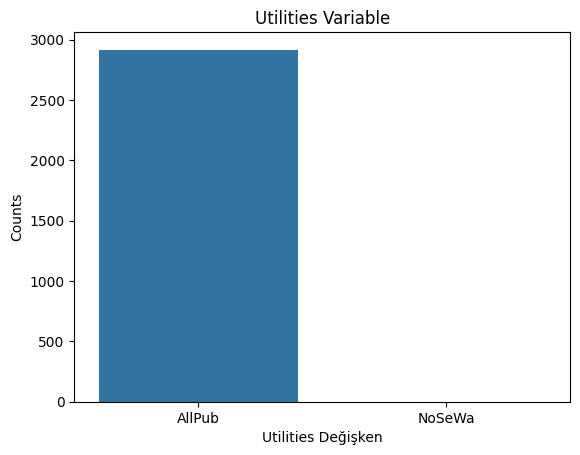

In [700]:
sns.countplot(x=data.Utilities,data=data)
plt.title("Utilities Variable")
plt.xlabel('Utilities Değişken')
plt.ylabel('Counts')
plt.show()

In [701]:
#data.drop(["Utilities"],axis=1,inplace=True)

In [702]:
def columns_check(variable_name):
    for i in data.columns:
        if i == variable_name:
            return print(f"data contains Variable named {variable_name}")
            
    return print(f"data not contains Variable named {variable_name}")

In [703]:
columns_check("Utilities")

data contains Variable named Utilities


In [704]:
data.LotFrontage.isnull().sum()

486

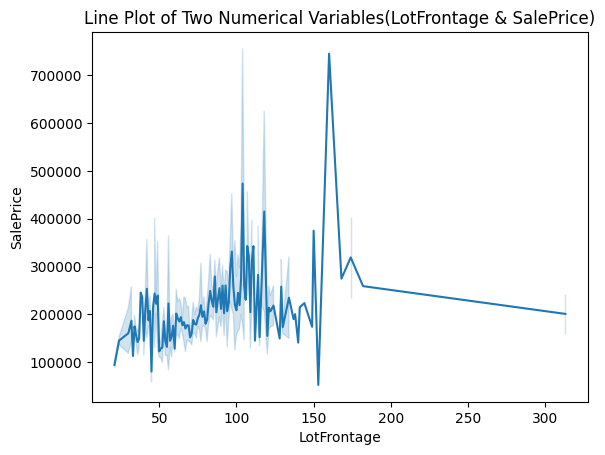

In [705]:
sns.lineplot(x='LotFrontage', y='SalePrice', data=data)
plt.title('Line Plot of Two Numerical Variables(LotFrontage & SalePrice)')
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.show()

In [706]:
data.LotFrontage.value_counts()

LotFrontage
60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
        ... 
152.0      1
138.0      1
182.0      1
168.0      1
133.0      1
Name: count, Length: 128, dtype: int64

In [707]:
data.Electrical.value_counts()

Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

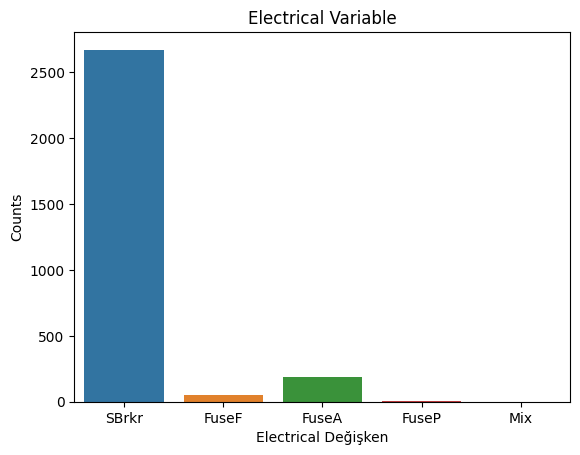

In [708]:
sns.countplot(x=data.Electrical,data=data)
plt.title("Electrical Variable")
plt.xlabel('Electrical Değişken')
plt.ylabel('Counts')
plt.show()

In [709]:
#data.drop(["Electrical"],axis=1,inplace=True)

In [710]:
miss_variable = data.isnull().sum()

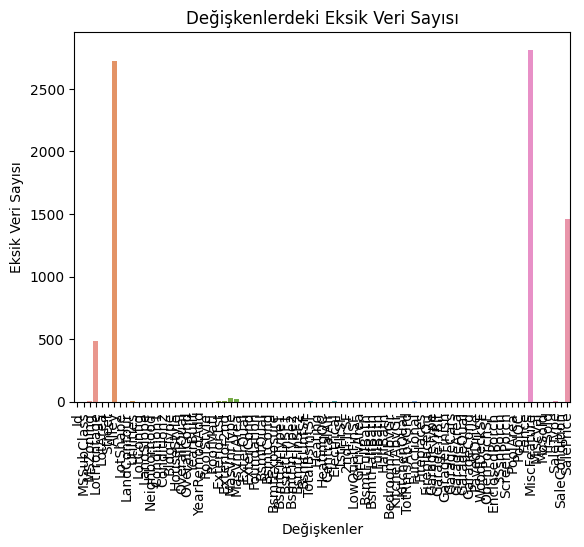

In [711]:
sns.barplot(x=miss_variable.index, y=miss_variable)
plt.xticks(rotation=90)
plt.xlabel('Değişkenler')
plt.ylabel('Eksik Veri Sayısı')
plt.title('Değişkenlerdeki Eksik Veri Sayısı')
plt.show()

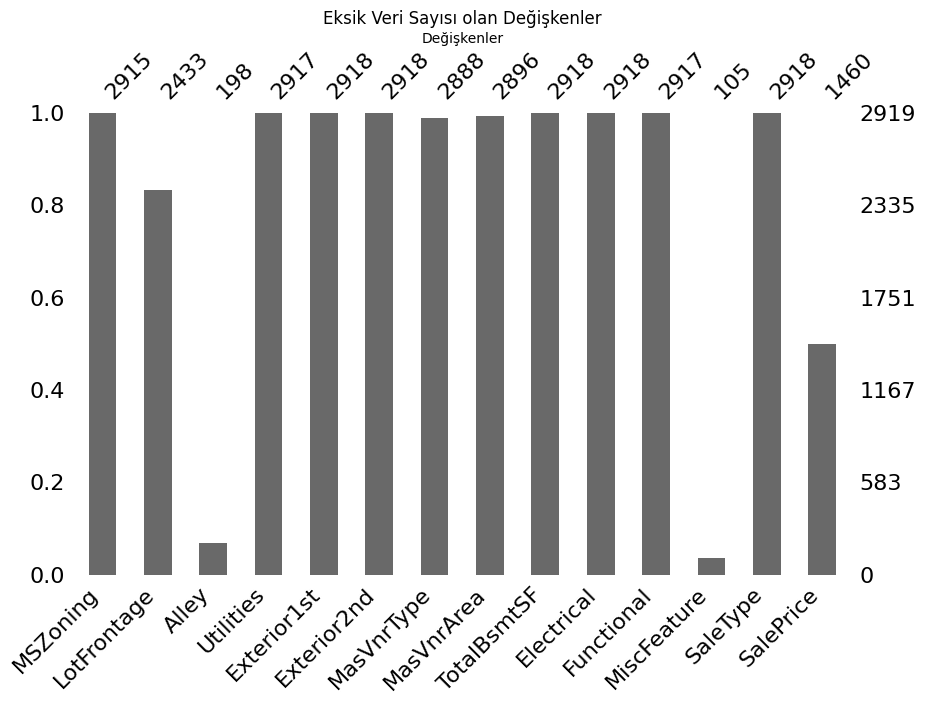

In [712]:
import missingno as msno
columns_with_missing = data.columns[data.isnull().any()]

# Sadece eksik veri içeren değişkenleri içeren alt küme oluşturuyoruz
data_missing_only = data[columns_with_missing]

# Missingno kütüphanesi ile eksik veri görselleştirmesi yapılıyor
msno.bar(data_missing_only, figsize=(10, 6))
plt.xlabel('Değişkenler')
plt.ylabel('Eksik Veri Sayısı')
plt.title('Eksik Veri Sayısı olan Değişkenler')
plt.show()

In [713]:
data.MiscFeature.isnull().sum()

2814

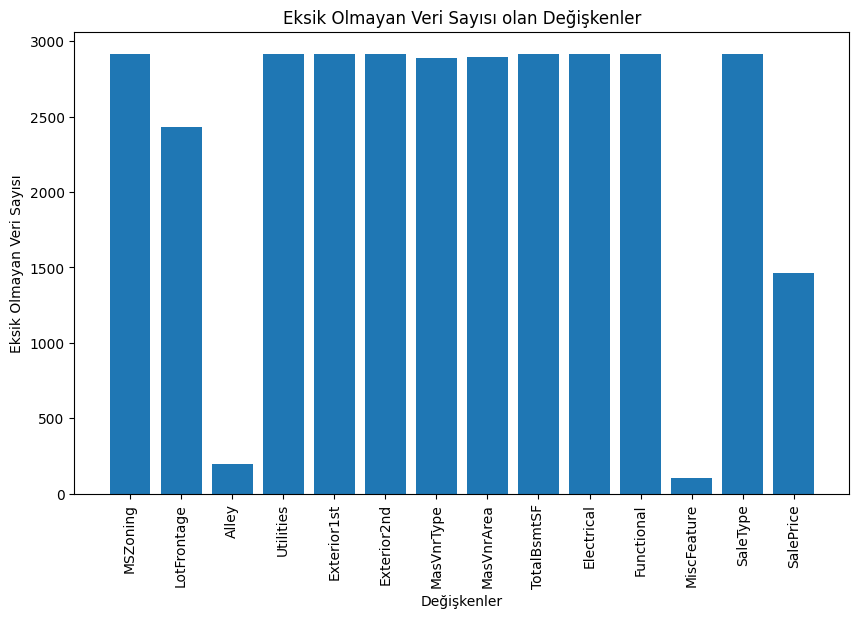

In [714]:
import matplotlib.pyplot as plt

# data isimli DataFrame'iniz olduğunu varsayalım
# Eksik olmayan verilerin sayısını alıyoruz
non_missing_counts = data.count()

# Eksik veri içeren değişkenleri filtreliyoruz
columns_with_missing = data.columns[data.isnull().any()]

# Eksik olmayan verilerin sayısını içeren DataFrame'i oluşturuyoruz
data_non_missing_counts = non_missing_counts[columns_with_missing]

# Grafik oluşturma
plt.figure(figsize=(10, 6))
plt.bar(data_non_missing_counts.index, data_non_missing_counts)
plt.xlabel('Değişkenler')
plt.ylabel('Eksik Olmayan Veri Sayısı')
plt.title('Eksik Olmayan Veri Sayısı olan Değişkenler')
plt.xticks(rotation=90)
plt.show()

In [715]:
data.LotFrontage.value_counts()

LotFrontage
60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
        ... 
152.0      1
138.0      1
182.0      1
168.0      1
133.0      1
Name: count, Length: 128, dtype: int64

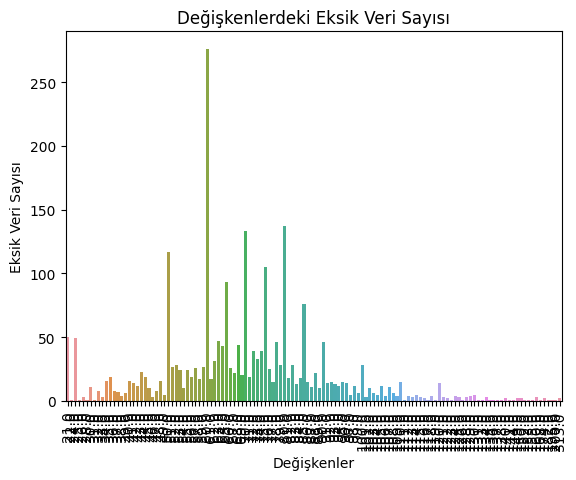

In [716]:

sns.countplot(x=data.LotFrontage ,data=data)
plt.xticks(rotation=90)
plt.xlabel('Değişkenler')
plt.ylabel('Eksik Veri Sayısı')
plt.title('Değişkenlerdeki Eksik Veri Sayısı')
plt.show()

In [717]:
data.LotFrontage.index

RangeIndex(start=0, stop=2919, step=1)

In [718]:
data.MasVnrType.isnull().sum()

31

In [719]:
data.MasVnrArea.isnull().sum()

23

In [720]:
masvnrare_miss_index = data[data.MasVnrArea.isnull()].index

In [721]:
data.loc[masvnrare_miss_index,["MasVnrType","MasVnrArea"]] = 0

In [722]:
data.MasVnrType.isnull().sum()

8

In [723]:
masvnrtype_miss_index = data[data.MasVnrType.isnull()].index

In [724]:
data.loc[masvnrtype_miss_index,["MasVnrType","MasVnrArea"]]

,MasVnrType,MasVnrArea
624,NaN,288.0
773,NaN,1.0
1230,NaN,1.0
1300,NaN,344.0
1334,NaN,312.0
1669,NaN,285.0
2452,NaN,1.0
2610,NaN,198.0


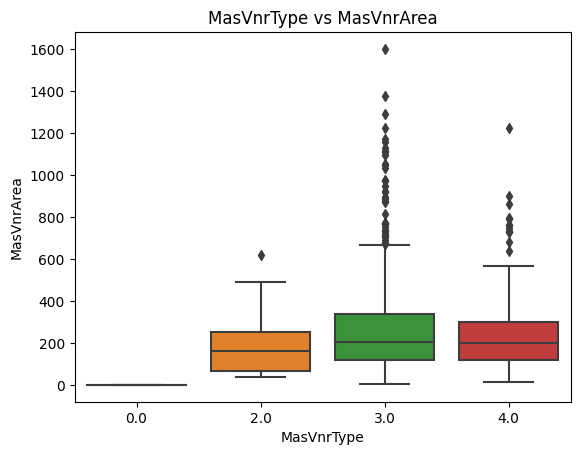

In [725]:
sns.boxplot(x=data.MasVnrType,y=data.MasVnrArea,data=data)
plt.title('MasVnrType vs MasVnrArea')
plt.xlabel('MasVnrType')
plt.ylabel('MasVnrArea')
plt.show()

In [726]:
data.MasVnrType.value_counts()

MasVnrType
0.0    1761
3.0     877
4.0     248
2.0      25
Name: count, dtype: int64

In [727]:
data[(data.MasVnrType.isnull())]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
624,625,60,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0.0,NaN,0,11,2006,WD,Normal,165150.0
773,774,20,RL,70.0,10150,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0.0,NaN,0,7,2007,COD,Normal,114500.0
1230,1231,90,RL,NaN,18890,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0.0,Gar2,8300,8,2007,WD,Normal,190000.0
1300,1301,60,RL,NaN,10762,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0.0,NaN,0,5,2009,WD,Normal,225000.0
1334,1335,160,RM,24.0,2368,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0.0,NaN,0,5,2009,WD,Normal,125000.0
1669,1670,20,RL,102.0,13514,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0.0,NaN,0,3,2009,WD,Normal,NaN
2452,2453,20,RM,52.0,8626,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0.0,NaN,0,5,2007,WD,Normal,NaN
2610,2611,20,RL,124.0,27697,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0.0,NaN,0,11,2007,COD,Abnorml,NaN


In [728]:
index_mas1 = data[(data.MasVnrType.isnull()) & (data.MasVnrArea==1)].index 

In [729]:
data.loc[index_mas1,["MasVnrType"]] = 0

In [730]:
data.loc[ index_mas1,["MasVnrType"]]

,MasVnrType
773,0.0
1230,0.0
2452,0.0


In [731]:
index_mas3 = data[(data.MasVnrType.isnull()) & (data.MasVnrArea!=1)].index 

In [732]:
data.loc[index_mas1,["MasVnrType"]] = 3

In [733]:
data.TotalBsmtSF.isnull().sum()

1

In [734]:
data.Functional.isnull().sum()

2

In [735]:
data.TotalBsmtSF.value_counts()

TotalBsmtSF
0.0       78
864.0     74
672.0     29
912.0     26
1040.0    25
          ..
1571.0     1
2633.0     1
757.0      1
873.0      1
1381.0     1
Name: count, Length: 1058, dtype: int64

In [736]:
data.Functional.value_counts()

Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64

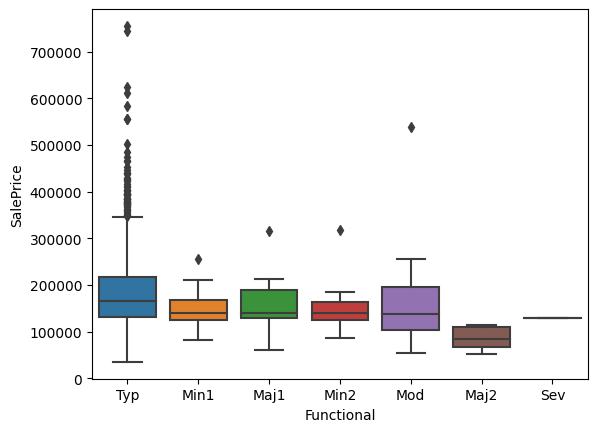

In [737]:
sns.boxplot(x=data.Functional,y=data.SalePrice,data=data)
plt.xlabel("Functional")
plt.ylabel("SalePrice")
plt.show()

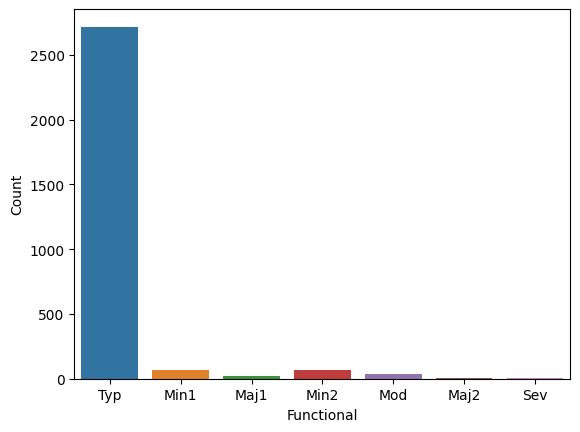

In [738]:
sns.countplot(x=data.Functional,data=data)
plt.xlabel("Functional")
plt.ylabel("Count")
plt.show()

In [739]:
#data.drop("Functional",axis=1,inplace=True)

In [740]:
columns_check("Functional")

data contains Variable named Functional


In [741]:
data.select_dtypes(["float64","int64"]).corr()["TotalBsmtSF"].sort_values(ascending=False)

TotalBsmtSF      1.000000
1stFlrSF         0.801670
SalePrice        0.613581
BsmtQual         0.577462
OverallQual      0.549294
BsmtFinSF1       0.536467
GarageArea       0.485979
GrLivArea        0.445276
GarageCars       0.437926
BsmtUnfSF        0.412285
YearBuilt        0.408515
BsmtExposure     0.407011
MasVnrArea       0.393657
BsmtCond         0.376593
MasVnrType       0.375060
LotFrontage      0.354822
GarageFinish     0.354312
BsmtFinType1     0.348518
FireplaceQu      0.346681
Fireplaces       0.332953
FullBath         0.327762
BsmtFullBath     0.325938
YearRemodAdd     0.298107
TotRmsAbvGrd     0.282126
LotArea          0.254138
GarageType       0.247267
OpenPorchSF      0.245521
WoodDeckSF       0.229600
GarageQual       0.181927
GarageCond       0.165907
GarageYrBlt      0.162709
BsmtFinType2     0.106904
PoolQC           0.104800
BsmtFinSF2       0.089410
MiscVal          0.084002
ScreenPorch      0.075363
PoolArea         0.072216
BedroomAbvGr     0.053393
3SsnPorch   

In [742]:
data.TotalBsmtSF.value_counts()

TotalBsmtSF
0.0       78
864.0     74
672.0     29
912.0     26
1040.0    25
          ..
1571.0     1
2633.0     1
757.0      1
873.0      1
1381.0     1
Name: count, Length: 1058, dtype: int64

In [743]:
bsmt_miss_index = data[(data.BsmtCond ==0)].index

In [744]:
totalBsmtSF_miss_index = data[data.TotalBsmtSF.isnull()].index

In [745]:
bsmt_miss_index

Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,  520,
        532,  533,  553,  646,  705,  736,  749,  778,  868,  894,  897,  984,
       1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216, 1218, 1232, 1321,
       1412, 1585, 1593, 1729, 1778, 1814, 1847, 1848, 1856, 1857, 1858, 1860,
       1915, 2040, 2050, 2066, 2068, 2120, 2122, 2185, 2188, 2189, 2190, 2193,
       2216, 2224, 2387, 2435, 2452, 2453, 2490, 2498, 2524, 2547, 2552, 2564,
       2578, 2599, 2702, 2763, 2766, 2803, 2804, 2824, 2891, 2904],
      dtype='int64')

In [746]:
totalBsmtSF_miss_index

Index([2120], dtype='int64')

In [747]:
data.TotalBsmtSF.fillna(0,inplace=True)

In [748]:
data.TotalBsmtSF.isnull().sum()

0

In [749]:
data.TotalBsmtSF.value_counts()

TotalBsmtSF
0.0       79
864.0     74
672.0     29
912.0     26
1040.0    25
          ..
1571.0     1
2633.0     1
757.0      1
873.0      1
1381.0     1
Name: count, Length: 1058, dtype: int64

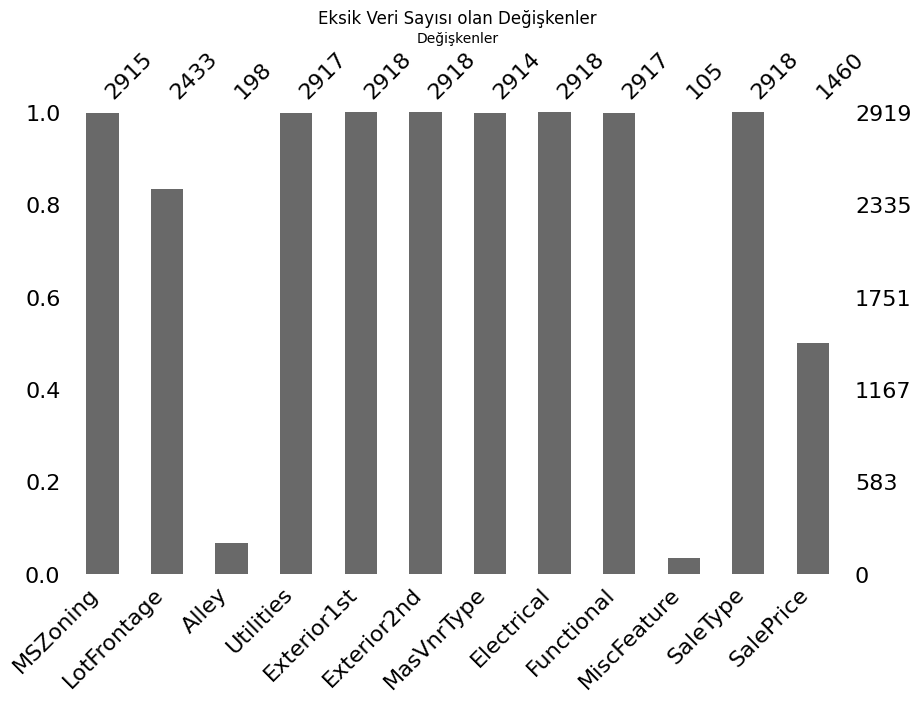

In [750]:
columns_with_missing = data.columns[data.isnull().any()]

# Sadece eksik veri içeren değişkenleri içeren alt küme oluşturuyoruz
data_missing_only = data[columns_with_missing]

# Missingno kütüphanesi ile eksik veri görselleştirmesi yapılıyor
msno.bar(data_missing_only, figsize=(10, 6))
plt.xlabel('Değişkenler')
plt.ylabel('Eksik Veri Sayısı')
plt.title('Eksik Veri Sayısı olan Değişkenler')
plt.show()

In [751]:
data[data.Exterior1st.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2151,2152,30,RL,85.0,19550,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0.0,NaN,0,1,2008,WD,Normal,NaN


In [752]:
data[data.Exterior2nd.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2151,2152,30,RL,85.0,19550,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0.0,NaN,0,1,2008,WD,Normal,NaN


In [753]:
data.Exterior1st.fillna(data.Exterior1st.mod,inplace=True)
data.Exterior2nd.fillna(data.Exterior2nd.mod,inplace=True)

In [754]:
data.SaleType.value_counts()

SaleType
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64

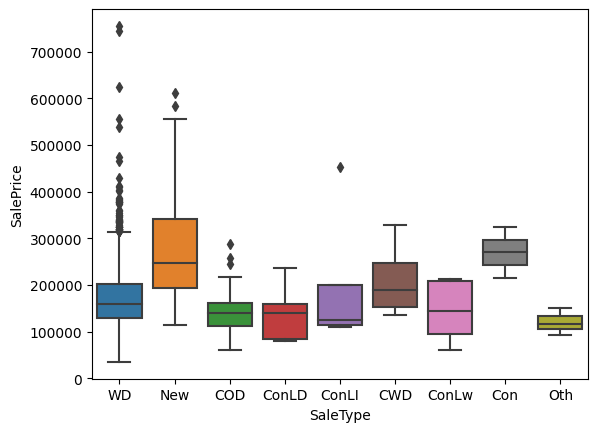

In [755]:
sns.boxplot(x=data.SaleType,y=data.SalePrice,data=data)
plt.xlabel("SaleType")
plt.ylabel("SalePrice")
plt.show()

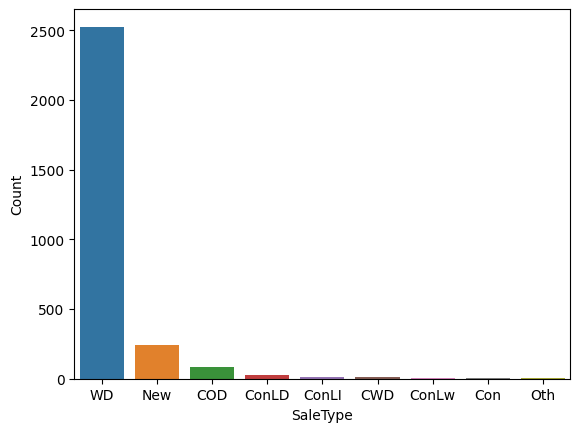

In [756]:
sns.countplot(x=data.SaleType,data=data)
plt.xlabel("SaleType")
plt.ylabel("Count")
plt.show()

In [757]:
#data.drop(["SaleType"],axis=1,inplace=True)

In [758]:
train_df = data.loc[:train_len-1,:]

In [759]:
len(train_df)

1460

In [760]:
test_df = data.loc[train_len:,:]

# Aykırı Gözlem 

In [761]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 5)
    
    return multiple_outliers

In [762]:
len(detect_outliers(train_df,numerical_var))

19

In [763]:
train_df.drop(detect_outliers(train_df,numerical_var),axis=0,inplace=True)

In [764]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      255
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [765]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1441 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1441 non-null   int64  
 1   MSSubClass     1441 non-null   int64  
 2   MSZoning       1441 non-null   object 
 3   LotFrontage    1186 non-null   float64
 4   LotArea        1441 non-null   int64  
 5   Street         1441 non-null   object 
 6   Alley          90 non-null     object 
 7   LotShape       1441 non-null   object 
 8   LandContour    1441 non-null   object 
 9   Utilities      1441 non-null   object 
 10  LotConfig      1441 non-null   object 
 11  LandSlope      1441 non-null   object 
 12  Neighborhood   1441 non-null   object 
 13  Condition1     1441 non-null   object 
 14  Condition2     1441 non-null   object 
 15  BldgType       1441 non-null   object 
 16  HouseStyle     1441 non-null   object 
 17  OverallQual    1441 non-null   int64  
 18  OverallCond  

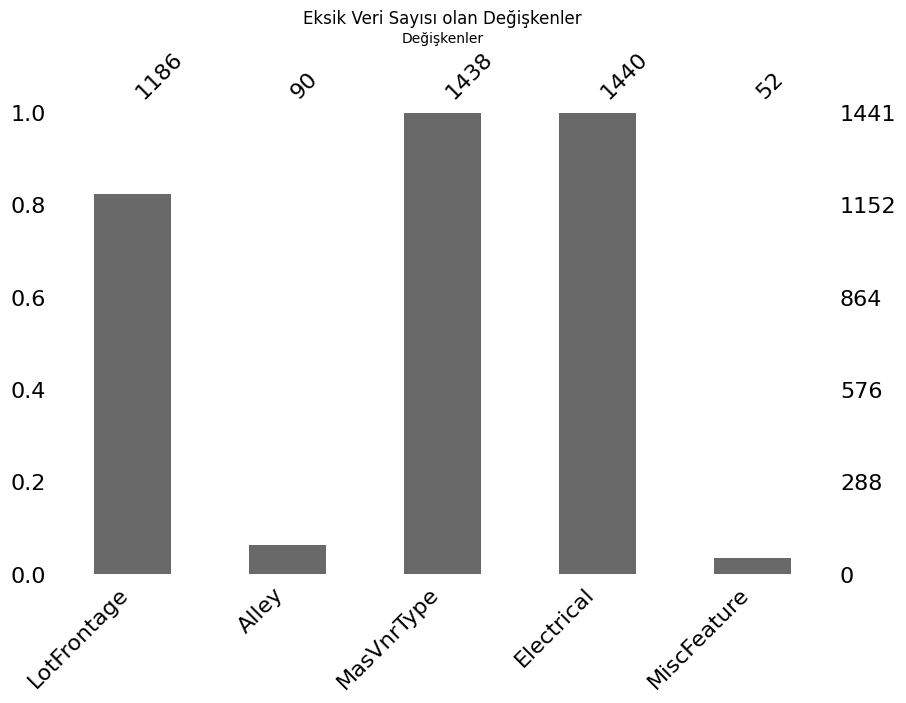

In [766]:
columns_with_missing = train_df.columns[train_df.isnull().any()]

# Sadece eksik veri içeren değişkenleri içeren alt küme oluşturuyoruz
data_missing_only = train_df[columns_with_missing]

# Missingno kütüphanesi ile eksik veri görselleştirmesi yapılıyor
msno.bar(data_missing_only, figsize=(10, 6))
plt.xlabel('Değişkenler')
plt.ylabel('Eksik Veri Sayısı')
plt.title('Eksik Veri Sayısı olan Değişkenler')
plt.show()

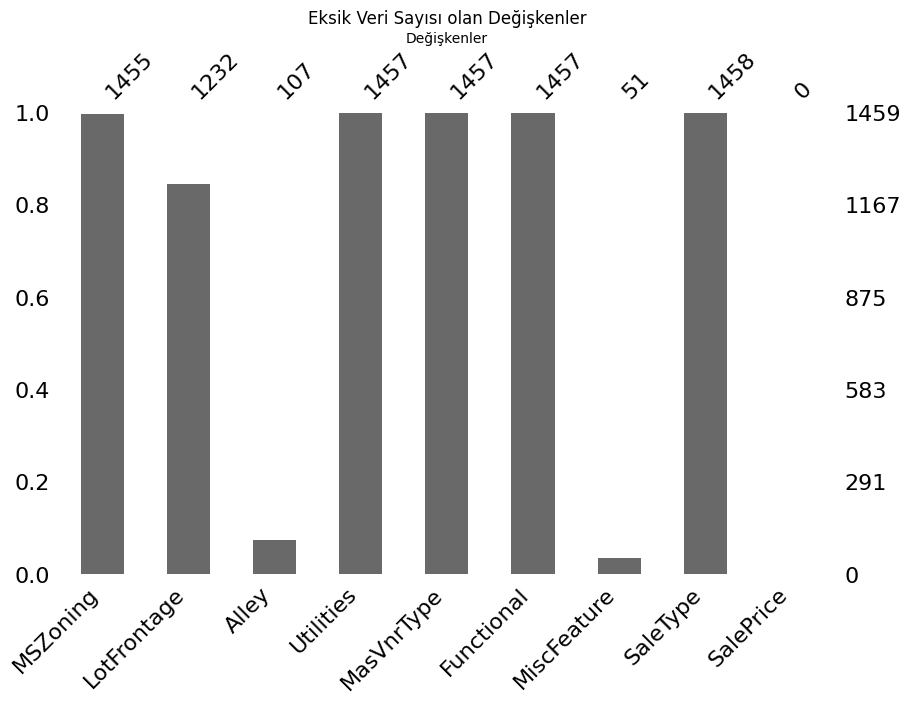

In [767]:
columns_with_missing = test_df.columns[test_df.isnull().any()]

# Sadece eksik veri içeren değişkenleri içeren alt küme oluşturuyoruz
data_missing_only = test_df[columns_with_missing]

# Missingno kütüphanesi ile eksik veri görselleştirmesi yapılıyor
msno.bar(data_missing_only, figsize=(10, 6))
plt.xlabel('Değişkenler')
plt.ylabel('Eksik Veri Sayısı')
plt.title('Eksik Veri Sayısı olan Değişkenler')
plt.show()

# Visualizing

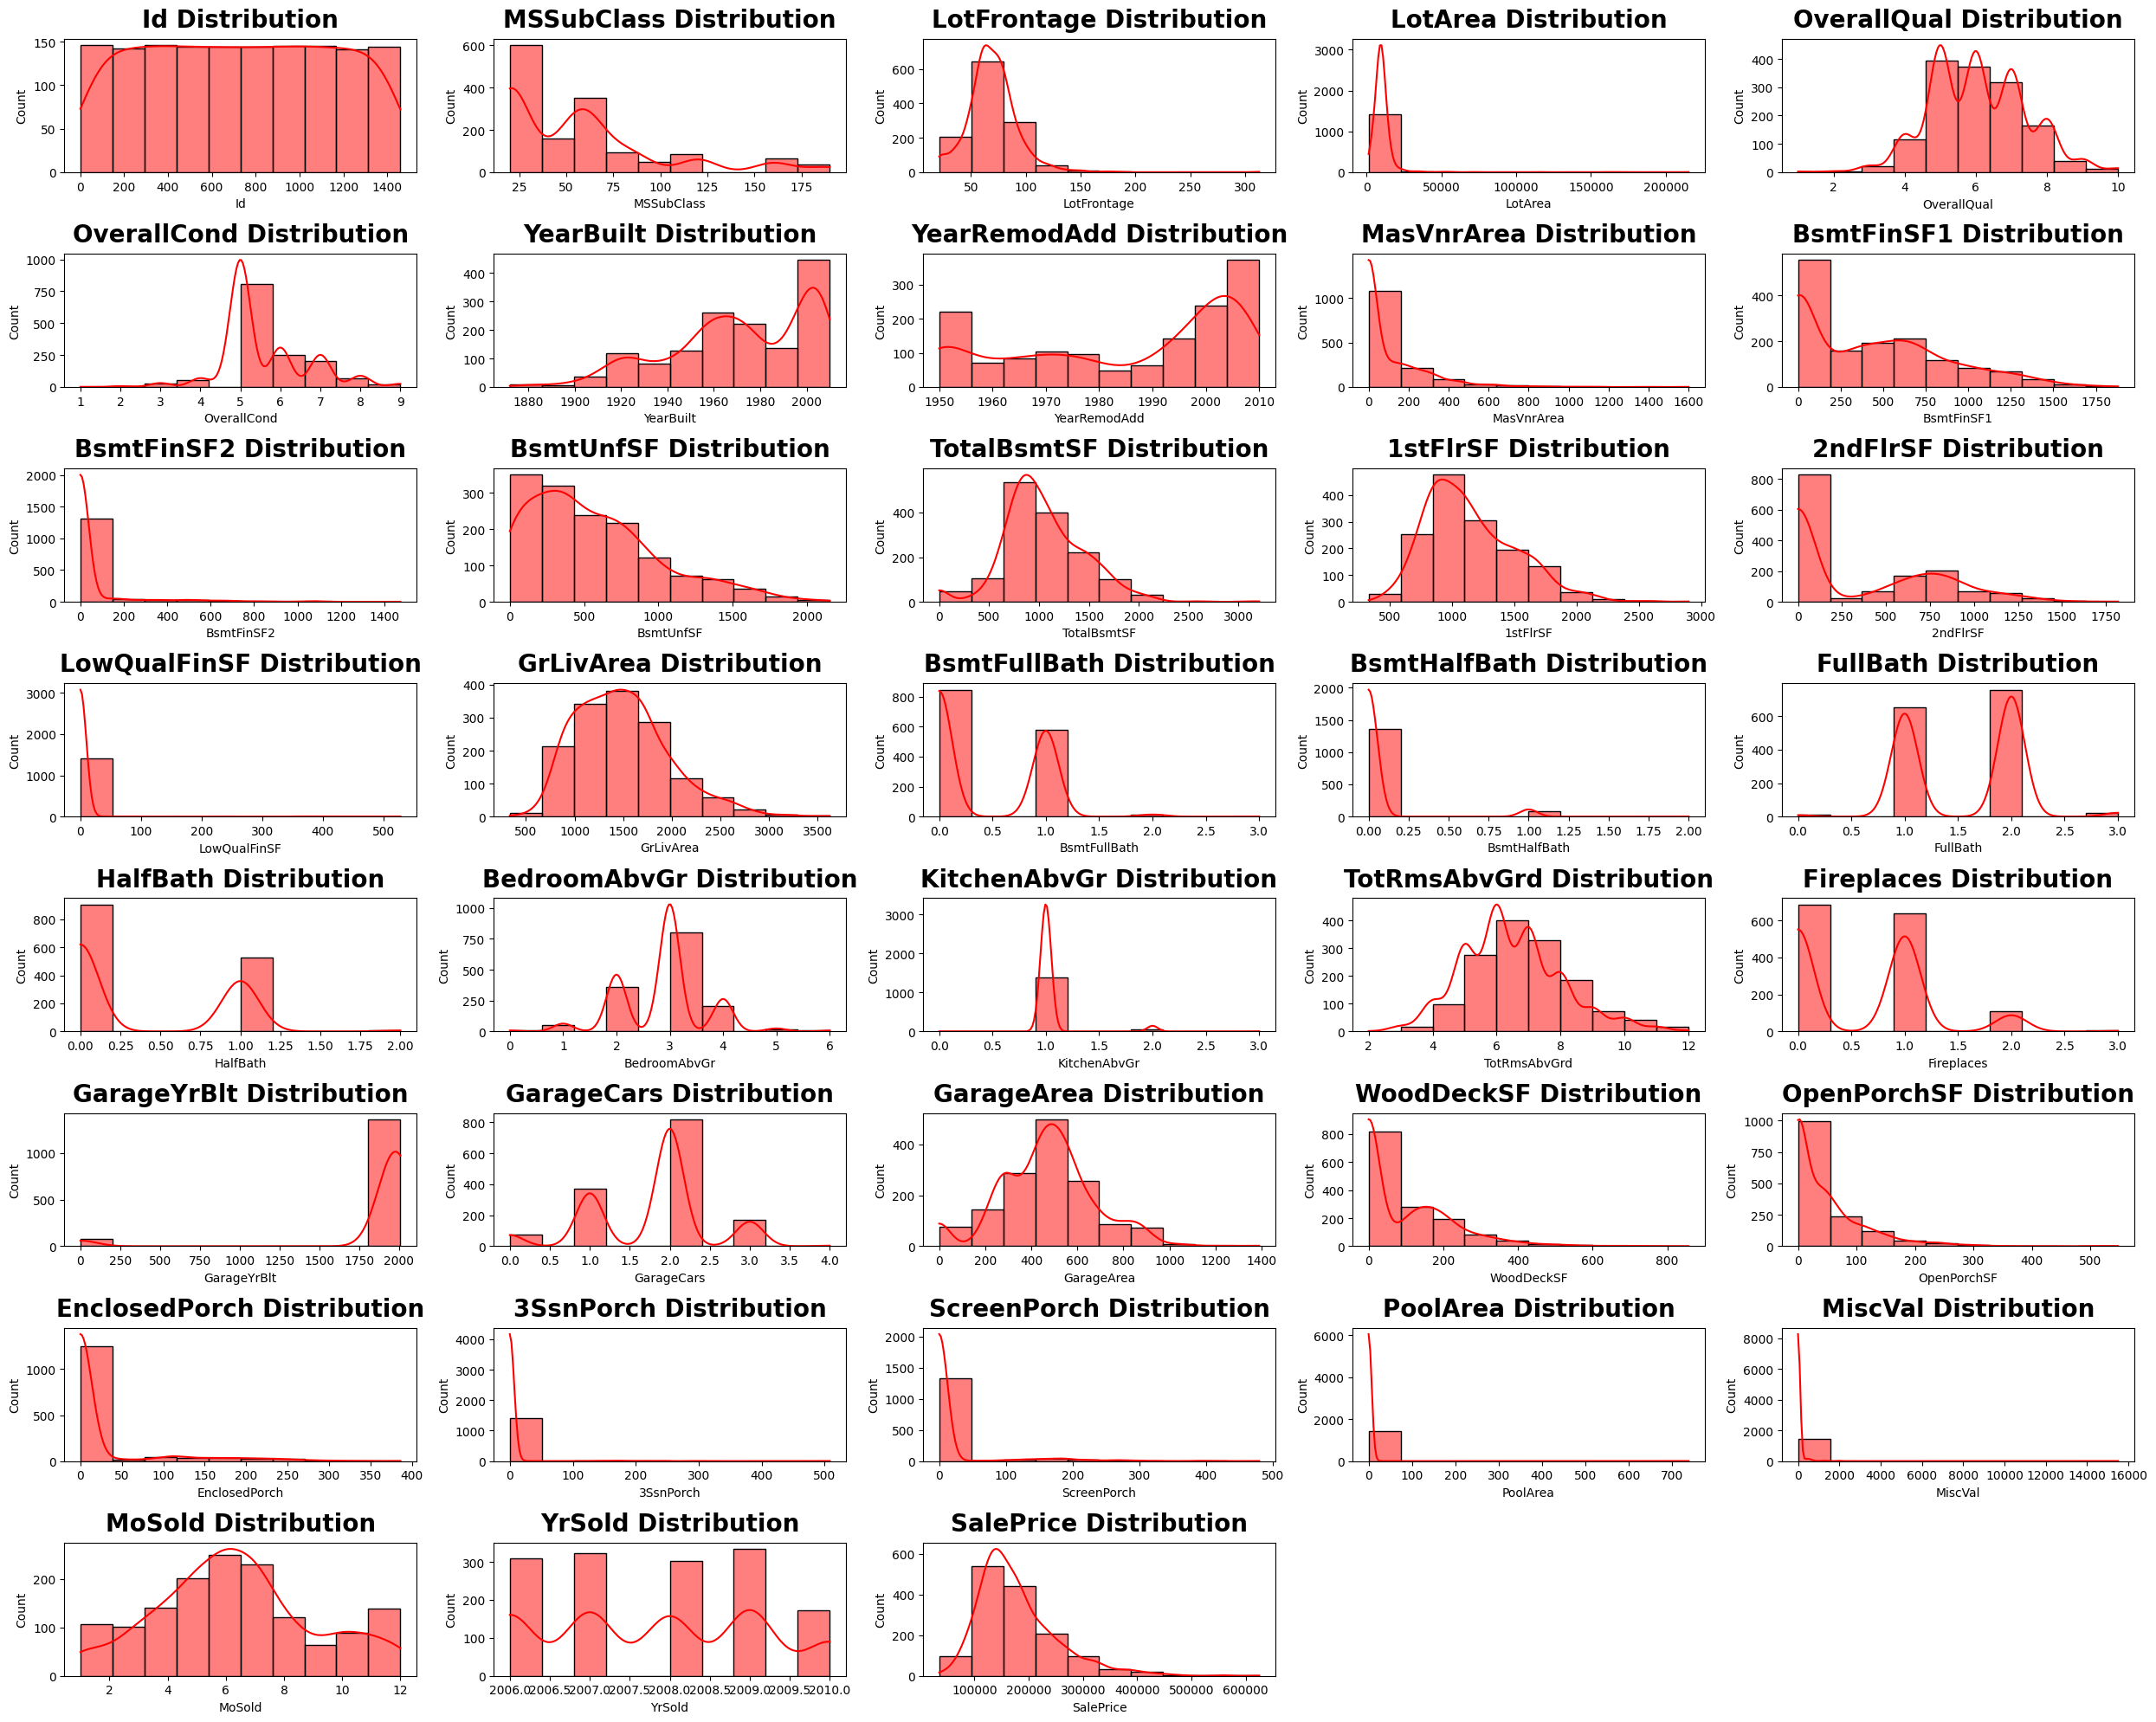

In [768]:
plt.figure(figsize=(25,20))
for index,column in enumerate(numerical_var):
    plt.subplot(8,5,index+1)
    sns.histplot(train_df[column],bins=10,kde=True,color="red")
    plt.title(f"{column} Distribution",fontweight="black",size=20,pad=10)
    plt.tight_layout()

In [769]:
len(numerical_var)

1460

In [770]:
len(numerical_var.columns)

38

In [771]:
con_cols = ["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF",
            "1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF",
            "EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal"]
len(con_cols)

19

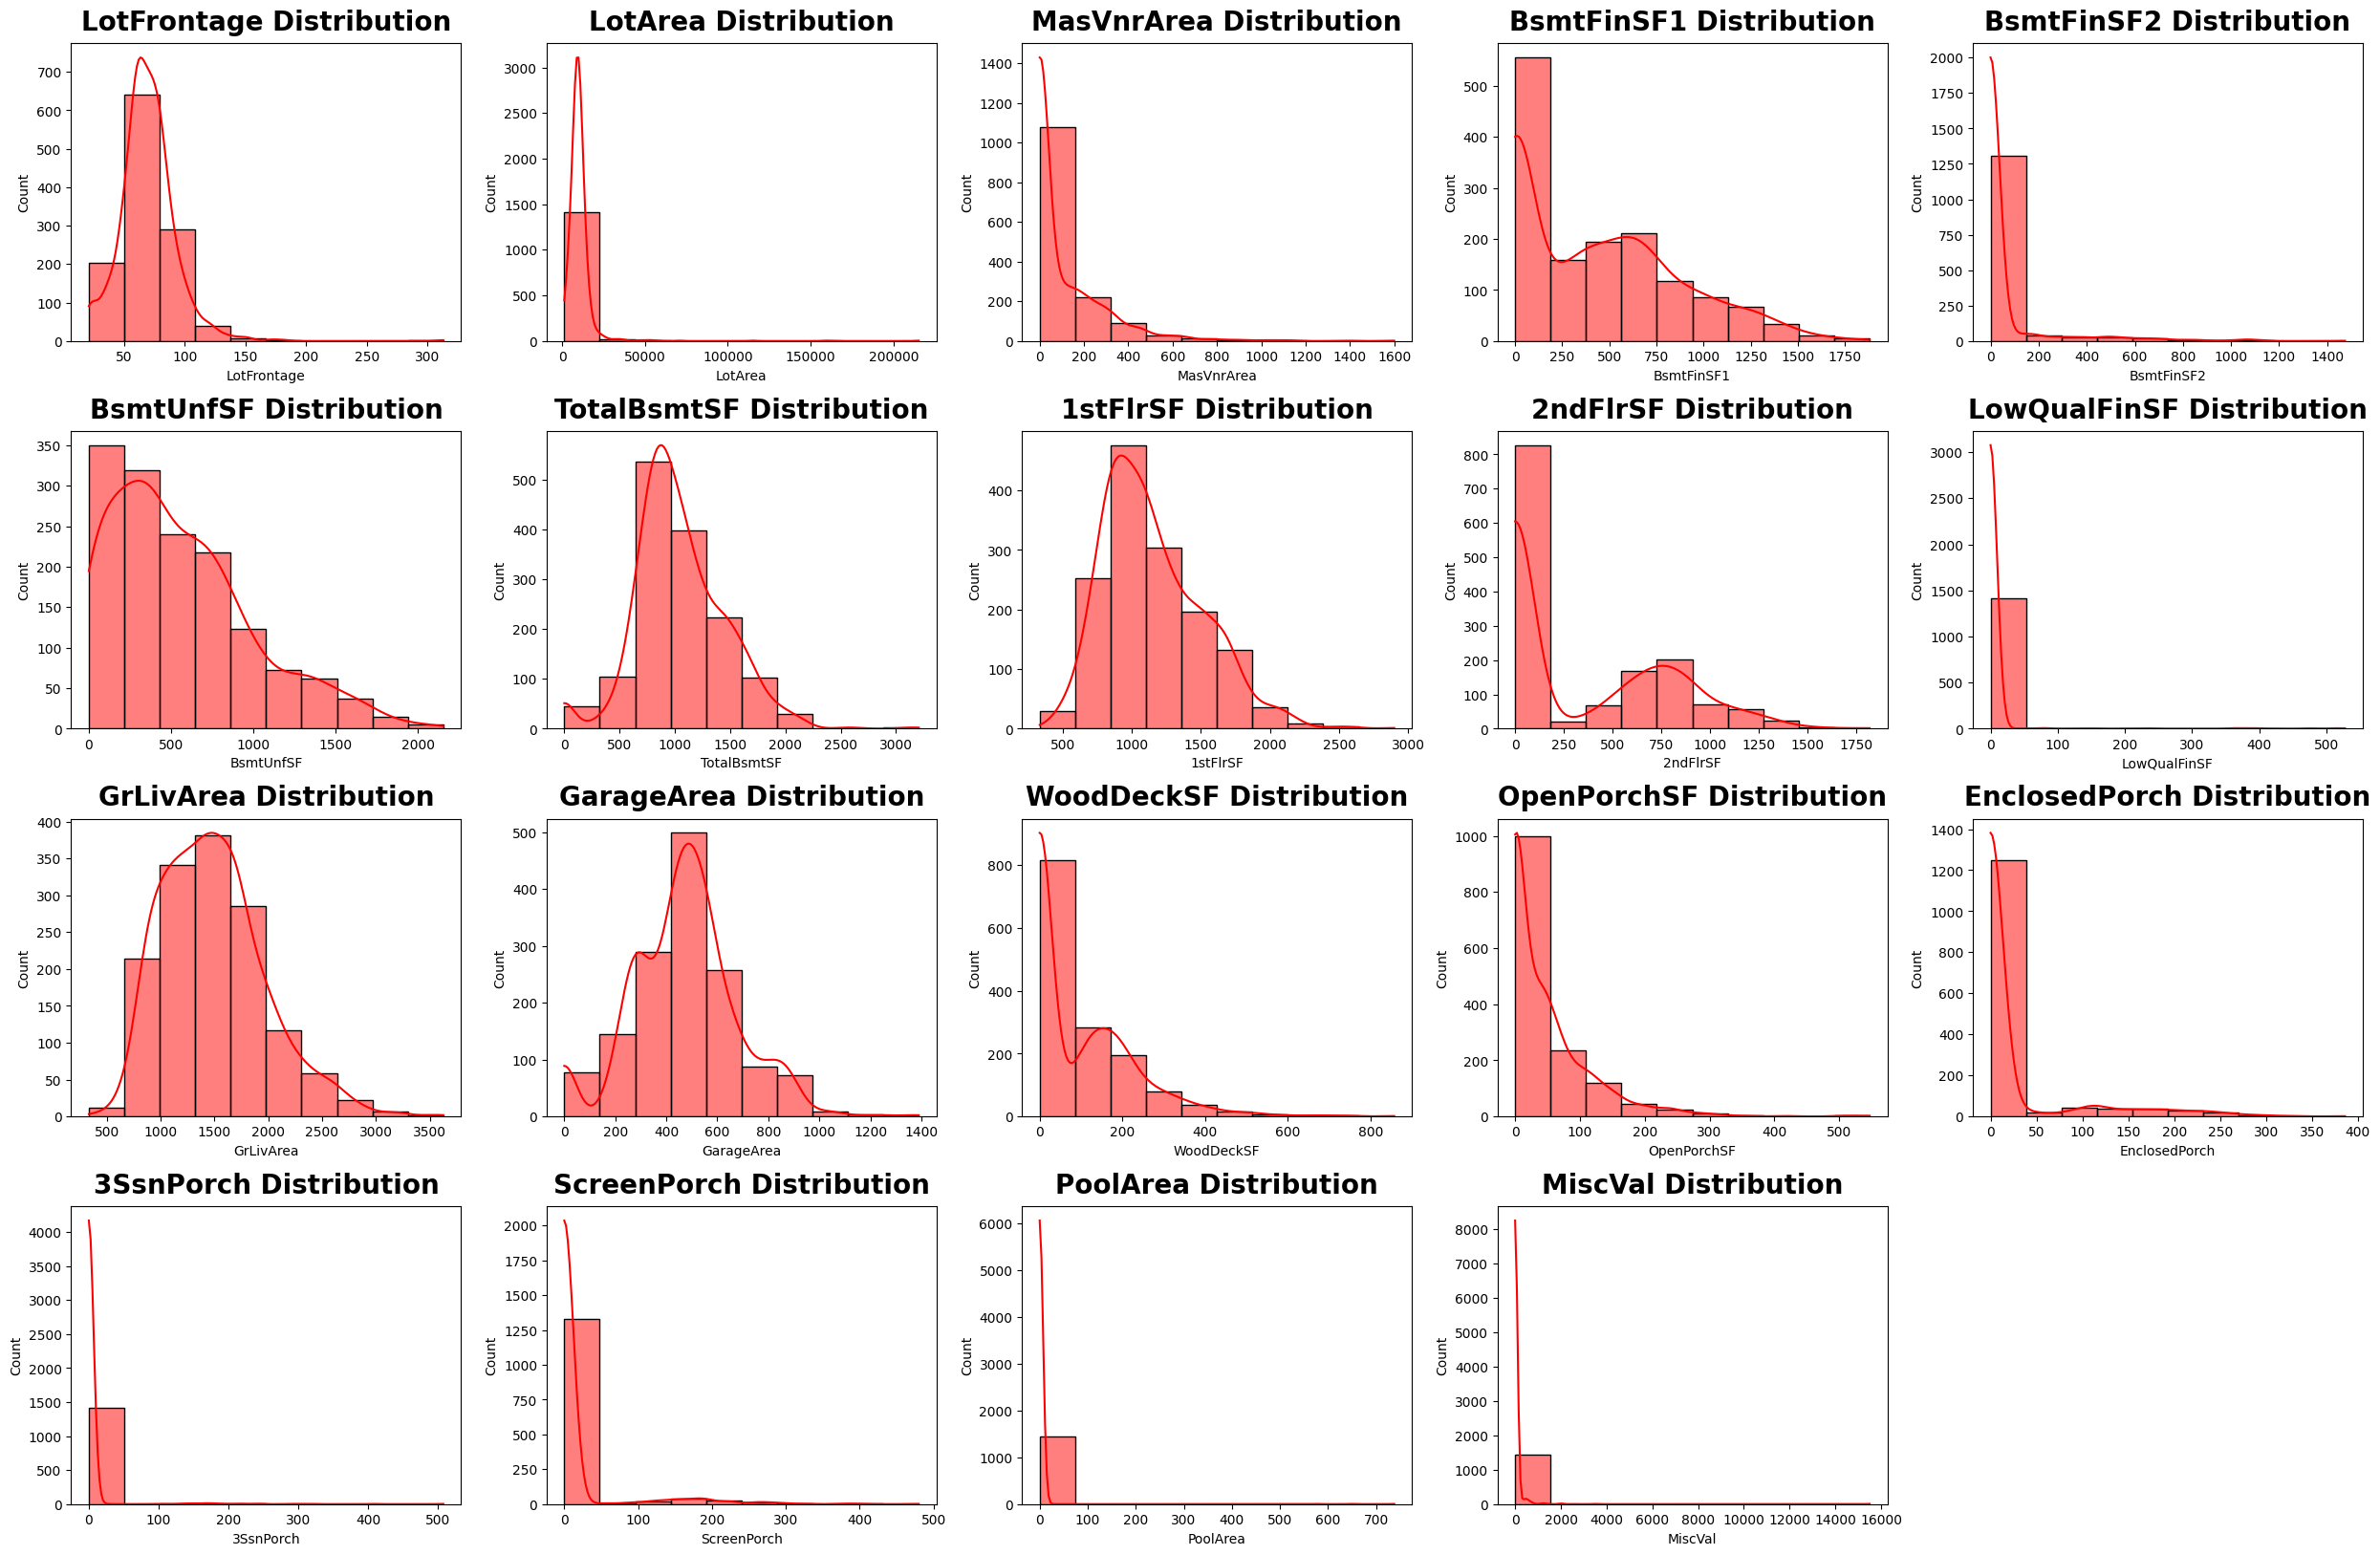

In [772]:
plt.figure(figsize=(25,20))
for index,column in enumerate(con_cols):
    plt.subplot(5,4+1,index+1)
    sns.histplot(train_df[column],bins=10,kde=True,color="red")
    plt.title(f"{column} Distribution",fontweight="black",size=20,pad=10)
    plt.tight_layout()

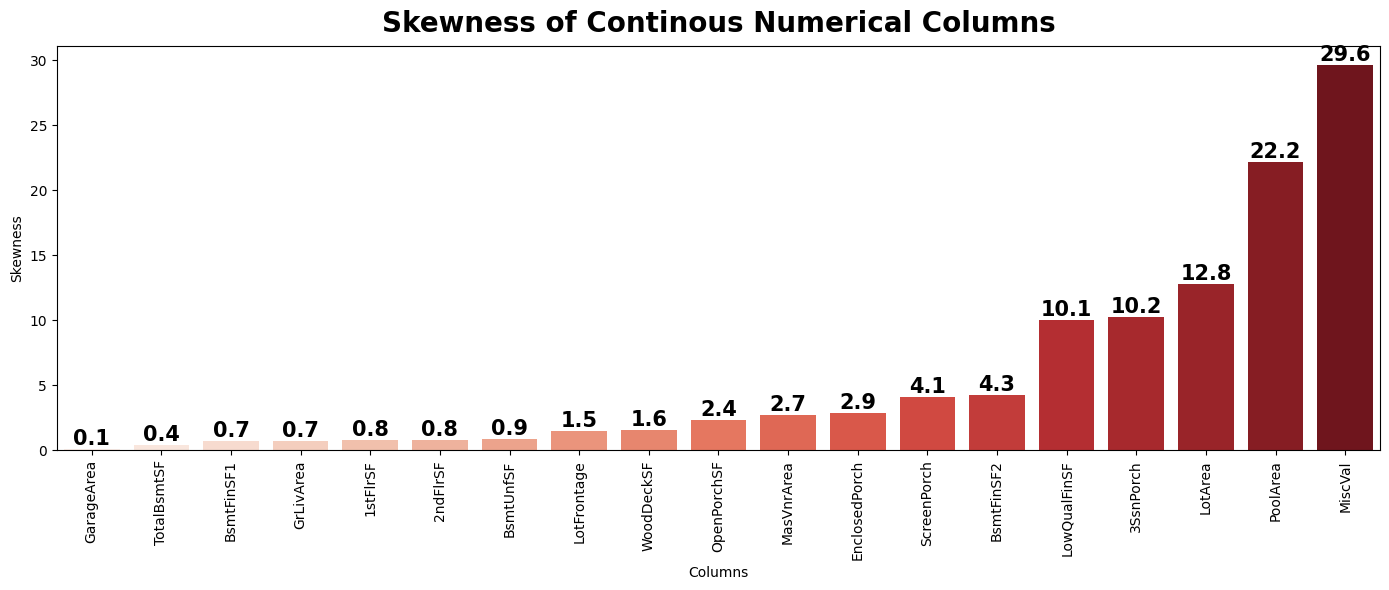

In [773]:
skewness = train_df[con_cols].skew().sort_values()

plt.figure(figsize=(14,6))
sns.barplot(x=skewness.index,y= skewness, palette=sns.color_palette("Reds",19))
for i, v in enumerate(skewness):
    plt.text(i, v, f"{v:.1f}", ha="center", va="bottom",size=15,fontweight="black")

plt.ylabel("Skewness")
plt.xlabel("Columns")
plt.xticks(rotation=90)
plt.title("Skewness of Continous Numerical Columns",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()

### Korelasyon karşılastırması yapacağız.

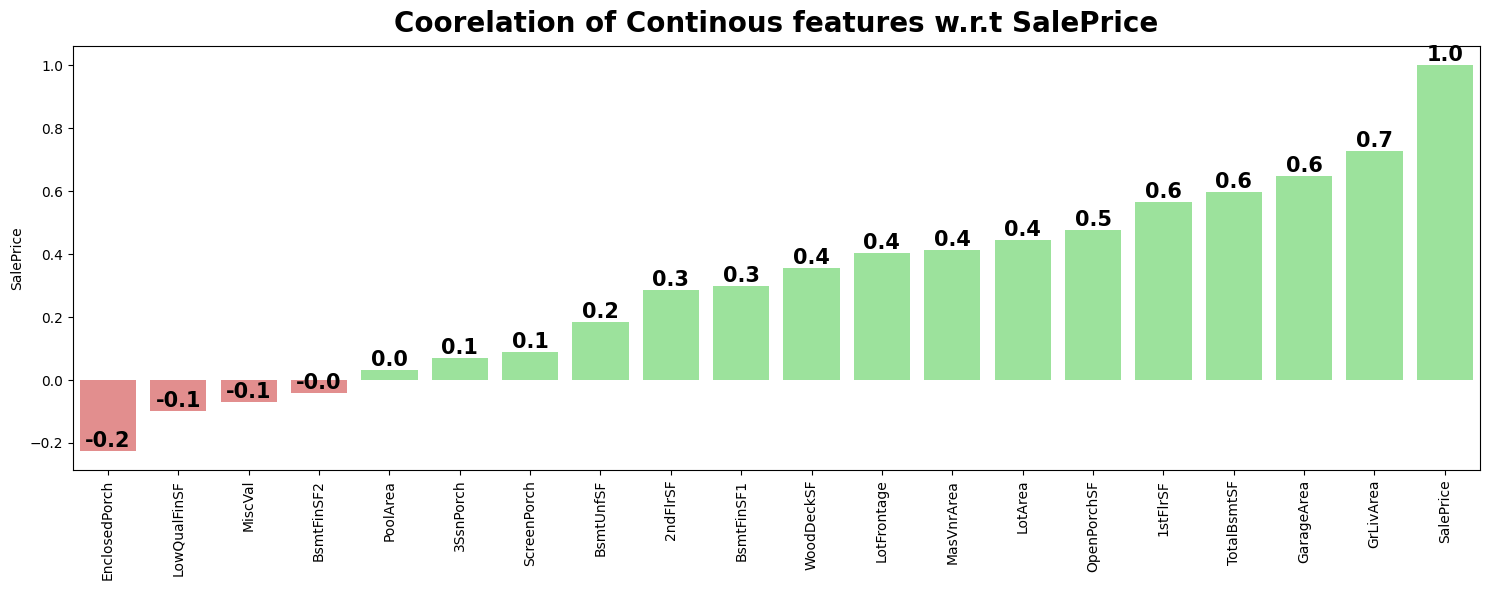

In [774]:
con_cols.append("SalePrice")
corr = train_df[con_cols].corr(method="spearman")["SalePrice"].sort_values()

plt.figure(figsize=(15,6))
sns.barplot(x=corr.index, y=corr, palette=["lightcoral" if v < 0 else "lightgreen" for v in corr])
for i, v in enumerate(corr):
    plt.text(i, v, f"{v:.1f}", ha="center", va="bottom",size=15,fontweight="black")

plt.title("Coorelation of Continous features w.r.t SalePrice",fontweight="black",size=20,pad=10)
plt.xticks(rotation=90)
plt.tight_layout()

In [775]:
categorical_var.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [776]:
cat_cols = train_df.select_dtypes(include="object").columns.tolist()

In [777]:
def boxplot(col_list):
    plt.figure(figsize=(22,12))
    for index,column in enumerate(col_list):
        plt.subplot(2,4,index+1)
        sns.boxplot(x=column, y="SalePrice", data=train_df)
        plt.title(f"{column} vs SalePrice",fontweight="black",pad=10,size=20)
        plt.xticks(rotation=90)
        plt.tight_layout()

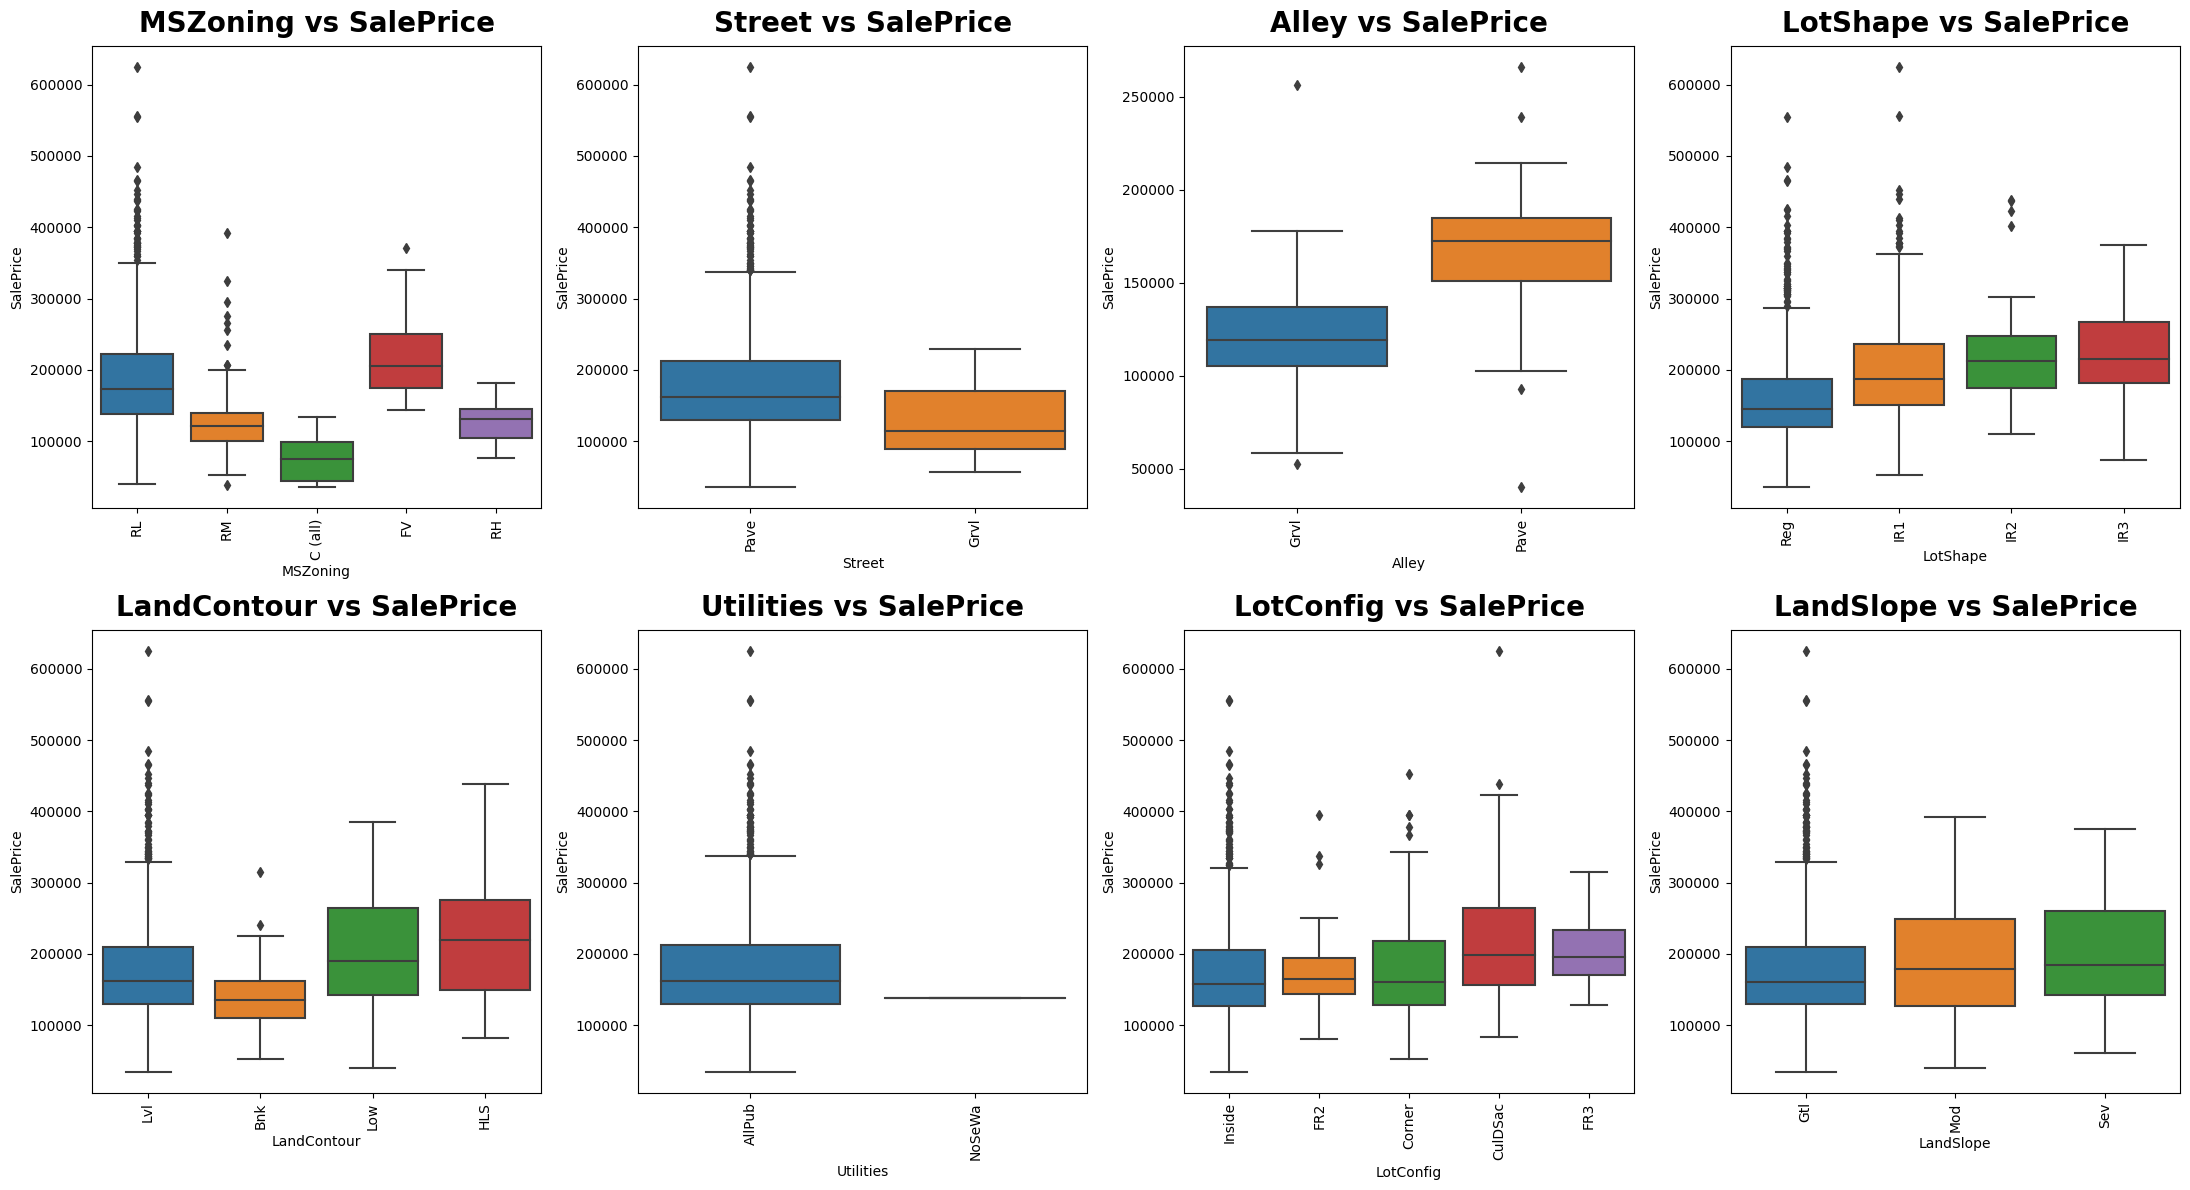

In [778]:
boxplot(cat_cols[0:8])

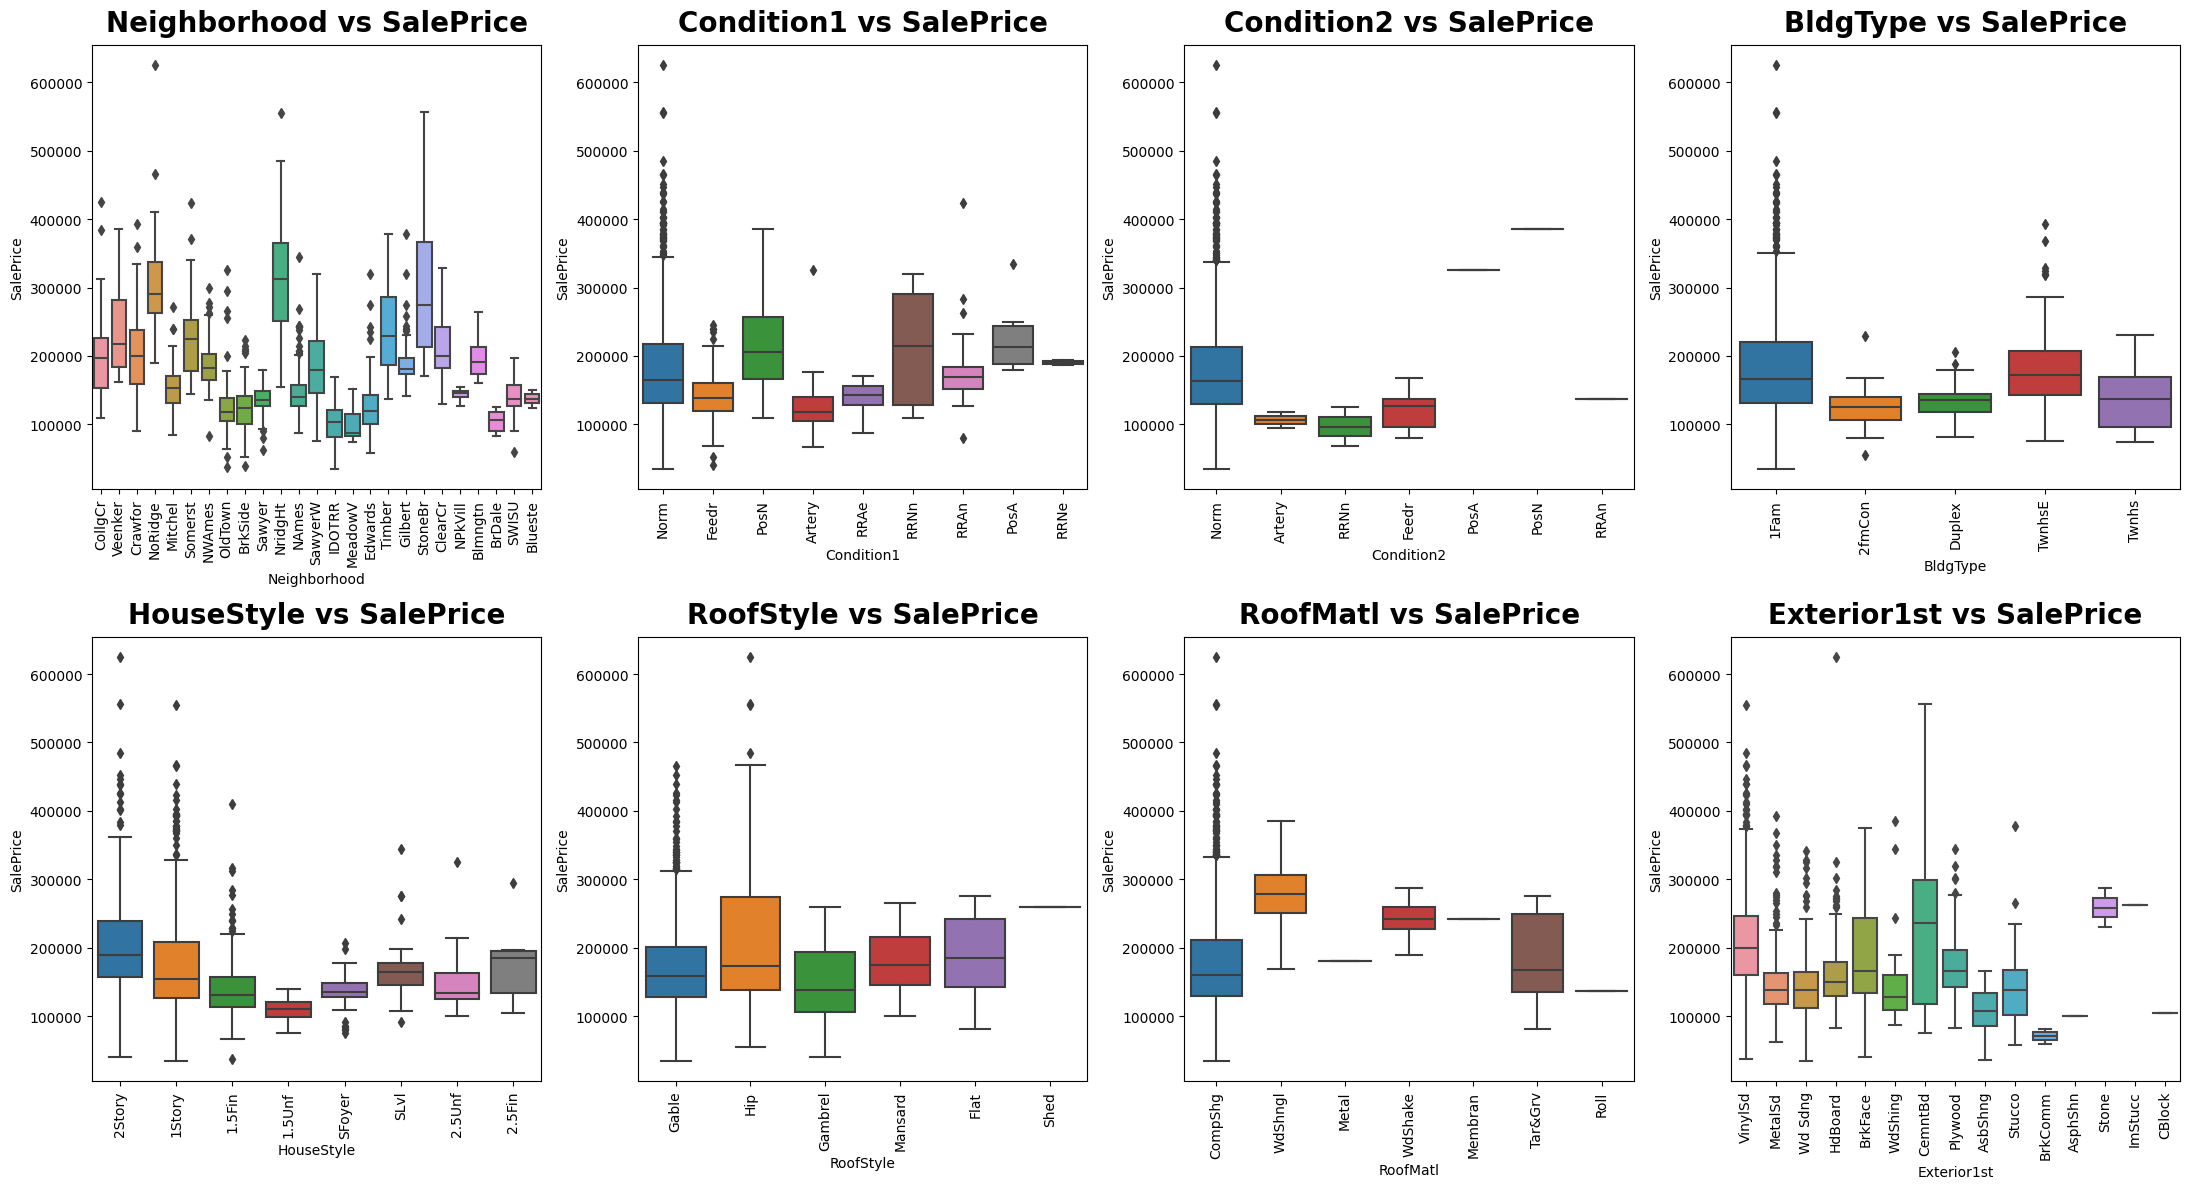

In [779]:
boxplot(cat_cols[8:16])

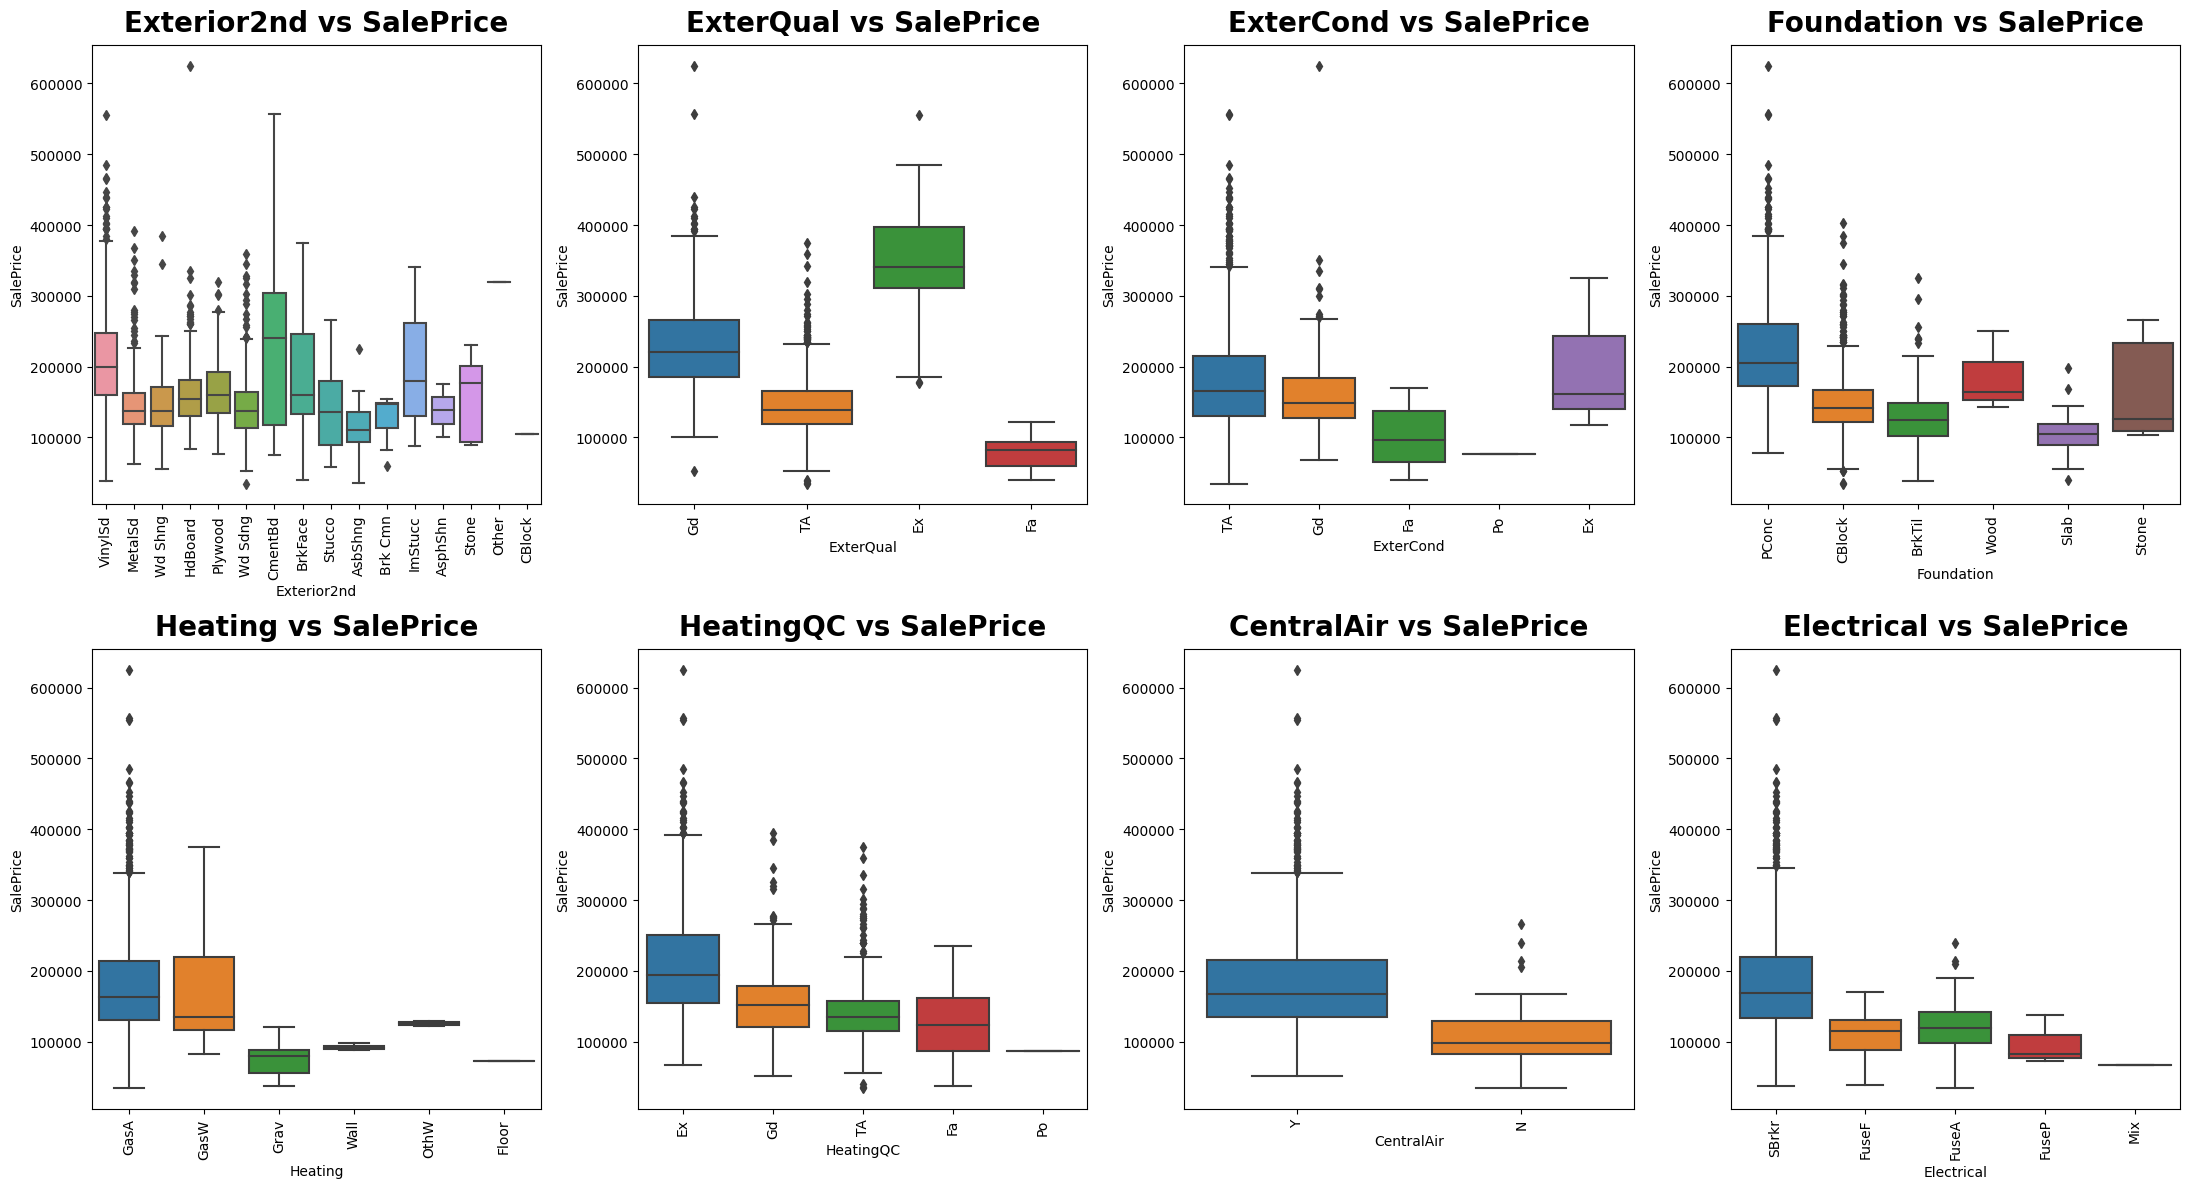

In [780]:
boxplot(cat_cols[16:24])

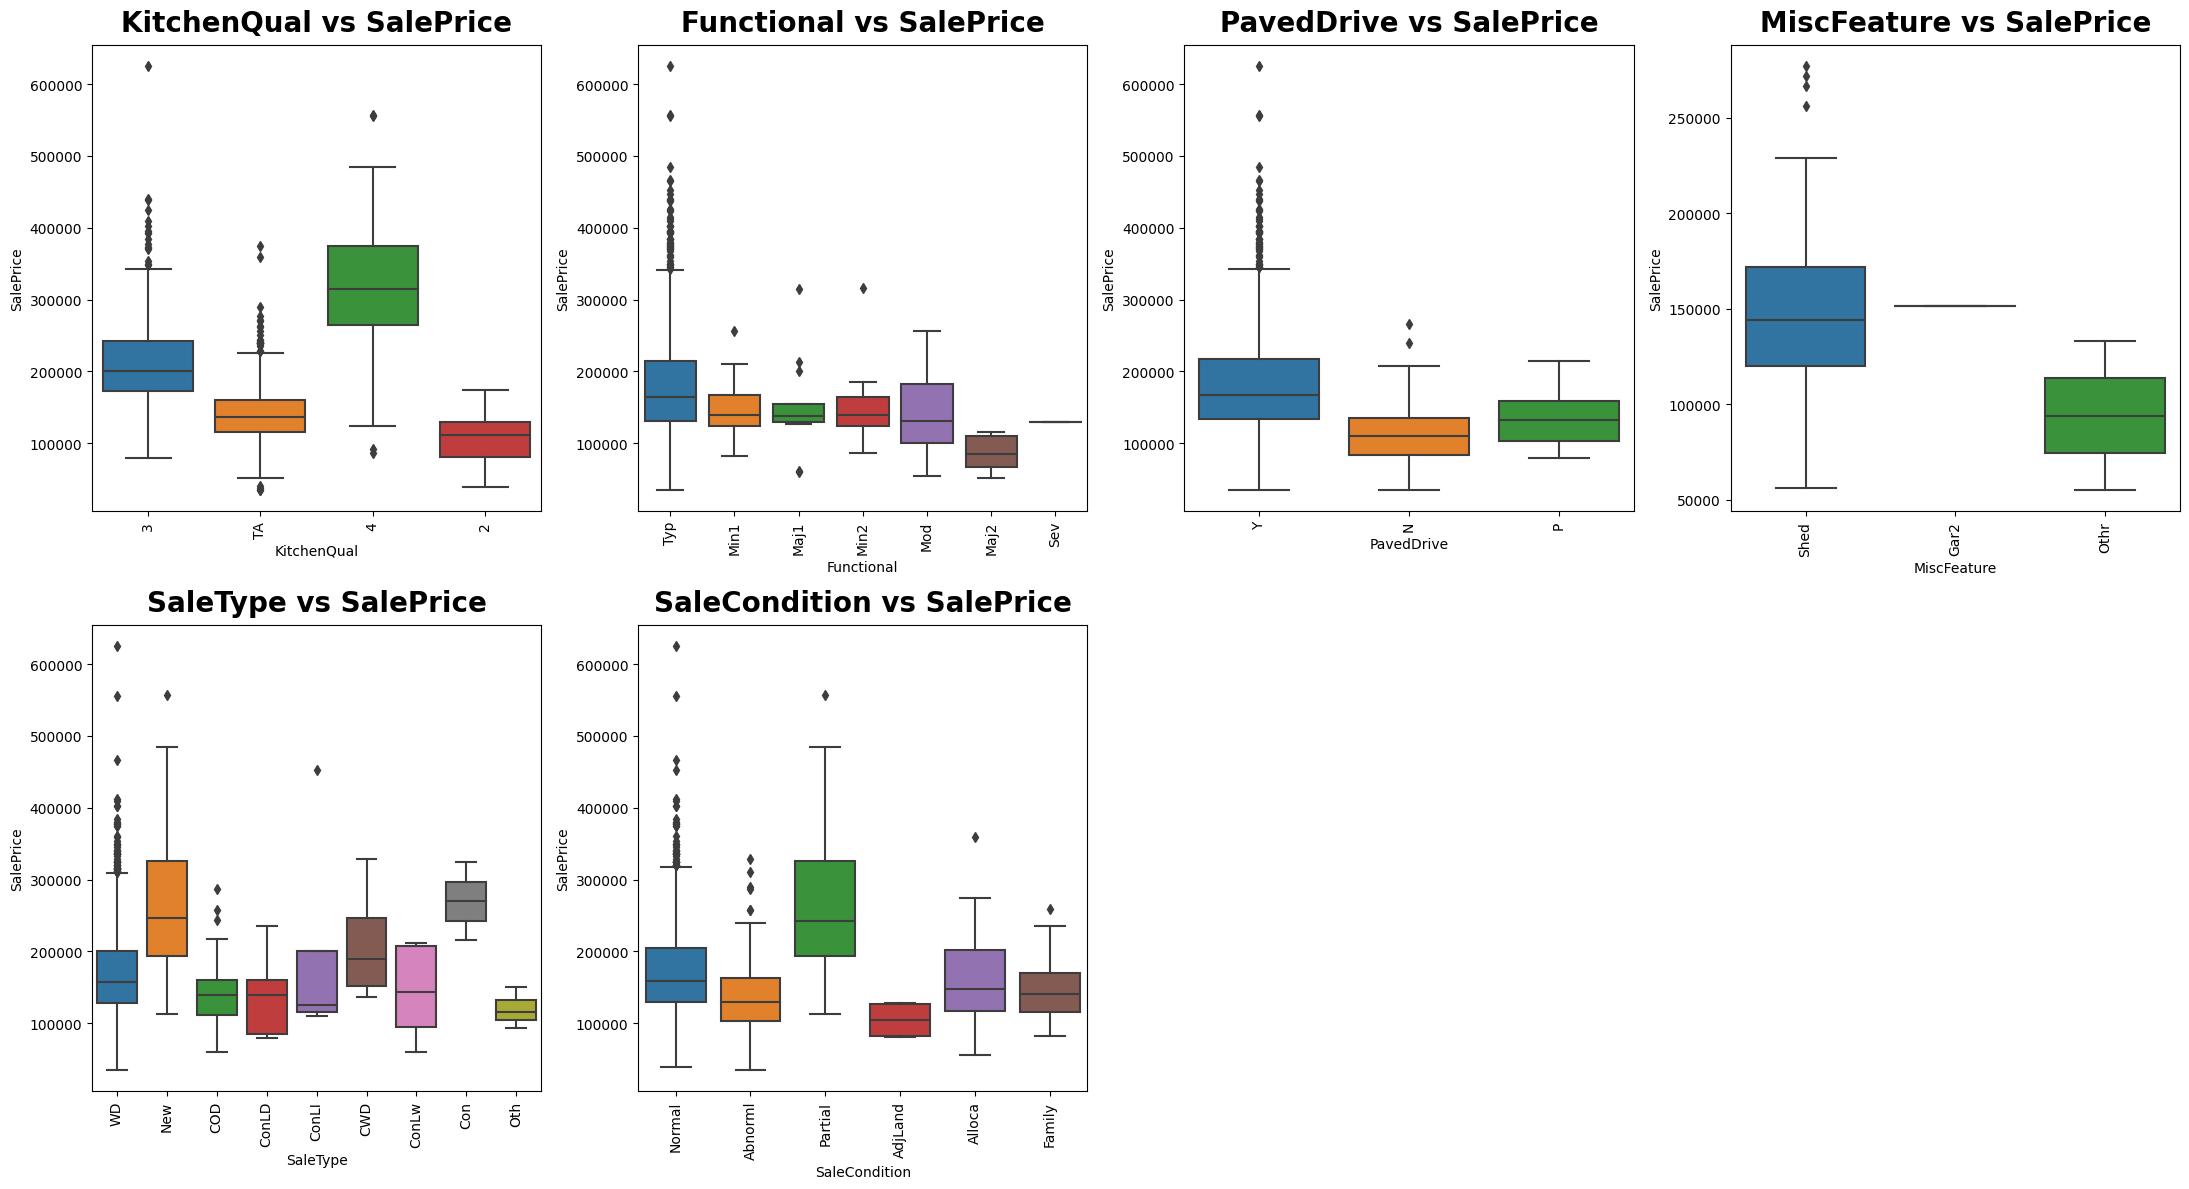

In [781]:
boxplot(cat_cols[24:32])

# Feature Engineering 

In [782]:
def drop(variable):
    for i in variable:
        train_df.drop(i,axis=1,inplace=True)
        test_df.drop(i,axis=1,inplace=True)

In [783]:
drop_var_ = ["Id","RoofMatl","Condition2","Street","Utilities","LowQualFinSF","MiscVal","BsmtFinSF2","PoolArea","3SsnPorch","ScreenPorch"]
drop(variable=drop_var_)

In [784]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'PoolQC',
       'Fence', 'MiscFeature', 'M

In [785]:
train_df.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       255
LotArea             0
Alley            1351
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 70, dtype: int64

In [786]:
train_df.drop("Alley",axis=1,inplace=True)
test_df.drop("Alley",axis=1,inplace=True)

In [787]:
train_df.isnull().sum().sum()

1648

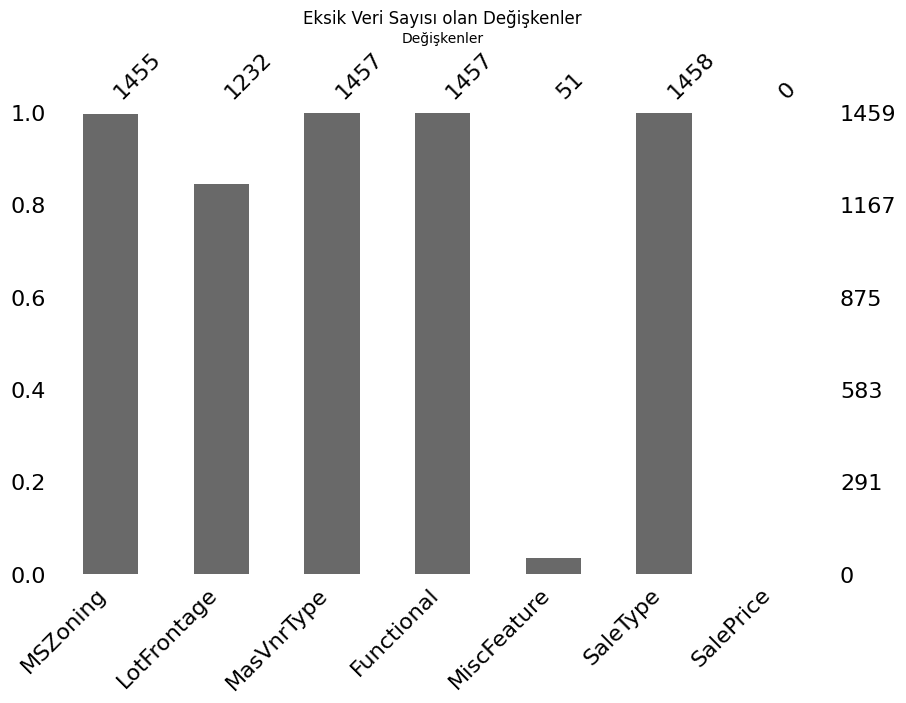

In [788]:
columns_with_missing = test_df.columns[test_df.isnull().any()]

# Sadece eksik veri içeren değişkenleri içeren alt küme oluşturuyoruz
data_missing_only = test_df[columns_with_missing]

# Missingno kütüphanesi ile eksik veri görselleştirmesi yapılıyor
msno.bar(data_missing_only, figsize=(10, 6))
plt.xlabel('Değişkenler')
plt.ylabel('Eksik Veri Sayısı')
plt.title('Eksik Veri Sayısı olan Değişkenler')
plt.show()

In [789]:
train_df.LotFrontage

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1441, dtype: float64

In [790]:
train_df.select_dtypes(["int64","float64"]).corr()["LotFrontage"].sort_values()

MSSubClass      -0.416917
OverallCond     -0.052386
BsmtHalfBath    -0.027527
EnclosedPorch   -0.013665
KitchenAbvGr    -0.002590
PoolQC           0.012352
YrSold           0.015619
BsmtFinType2     0.015922
Fence            0.018167
2ndFlrSF         0.036380
HalfBath         0.036977
MoSold           0.039945
BsmtCond         0.051387
BsmtFinType1     0.065176
BsmtFullBath     0.074832
YearRemodAdd     0.077048
WoodDeckSF       0.084686
GarageYrBlt      0.116154
OpenPorchSF      0.116269
GarageCond       0.119983
YearBuilt        0.123171
GarageQual       0.123275
MasVnrType       0.129040
BsmtFinSF1       0.134870
BsmtQual         0.137031
BsmtUnfSF        0.139535
MasVnrArea       0.161199
BsmtExposure     0.161633
FullBath         0.177726
GarageType       0.203421
OverallQual      0.220944
FireplaceQu      0.233358
Fireplaces       0.233781
GarageFinish     0.241288
BedroomAbvGr     0.274237
GarageCars       0.293959
TotalBsmtSF      0.308882
GarageArea       0.320248
TotRmsAbvGrd

<Figure size 800x600 with 0 Axes>

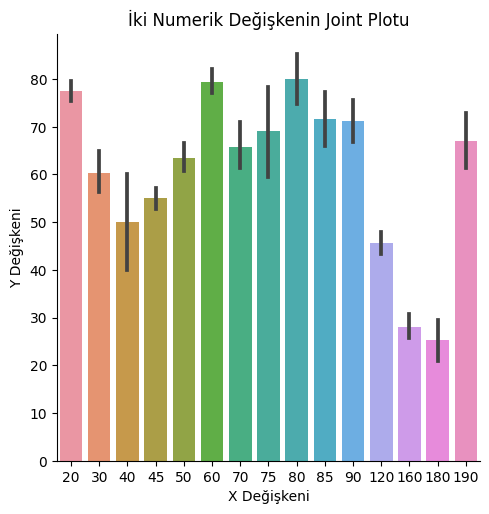

In [791]:
plt.figure(figsize=(8, 6))
sns.catplot(x="MSSubClass", y="LotFrontage",data=train_df, kind='bar')
plt.xlabel('X Değişkeni')
plt.ylabel('Y Değişkeni')
plt.title('İki Numerik Değişkenin Joint Plotu')
plt.show()

In [792]:
train_df.LotFrontage.isnull().sum()

255

In [793]:
train_df.LotFrontage.fillna(78,inplace=True)

In [794]:
train_df.LotFrontage.value_counts()

LotFrontage
78.0     280
60.0     142
70.0      70
80.0      68
50.0      57
        ... 
174.0      1
38.0       1
33.0       1
150.0      1
46.0       1
Name: count, Length: 108, dtype: int64

In [795]:
train_df.LotFrontage.fillna(train_df.LotFrontage.mod,inplace=True)

In [796]:
test_df.LotFrontage.fillna(78,inplace=True)

In [797]:
test_df.LotFrontage.isnull().sum()

0

In [798]:
train_df.Functional.isnull().sum()

0

In [799]:
test_df.Functional.isnull().sum()

2

In [800]:
test_df.Functional.fillna(test_df.Functional.mod,inplace=True)

In [801]:
train_df[train_df.isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [802]:
train_df.head(1000)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,61,0,0,0.0,NaN,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0.0,NaN,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,42,0,0,0.0,NaN,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,35,272,0,0.0,NaN,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,84,0,0,0.0,NaN,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,20,RL,78.0,12155,IR3,Lvl,Inside,Gtl,NAmes,PosN,...,0,0,0,0.0,NaN,3,2007,WD,Normal,163500.0
1007,160,RM,21.0,2217,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,0,0,0,0.0,NaN,8,2009,WD,Normal,88000.0
1008,20,RL,43.0,12118,IR1,Lvl,CulDSac,Gtl,Mitchel,Norm,...,48,0,0,0.0,NaN,4,2009,WD,Normal,240000.0
1009,50,RL,60.0,6000,Reg,Lvl,Inside,Gtl,SWISU,Norm,...,0,138,0,0.0,NaN,6,2006,WD,Normal,102000.0


In [803]:
train_df.drop("PoolQC",axis=1,inplace=True)
test_df.drop("PoolQC",axis=1,inplace=True)
train_df.drop("Fence",axis=1,inplace=True)
test_df.drop("Fence",axis=1,inplace=True)

In [804]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,Y,0,61,0,NaN,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,Y,298,0,0,NaN,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,Y,0,42,0,NaN,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,Y,0,35,272,NaN,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,Y,192,84,0,NaN,12,2008,WD,Normal,250000.0


In [805]:
train_df.MiscFeature.isnull().sum()

1389

In [806]:
train_df.drop("MiscFeature",axis=1,inplace=True)
test_df.drop("MiscFeature",axis=1,inplace=True)

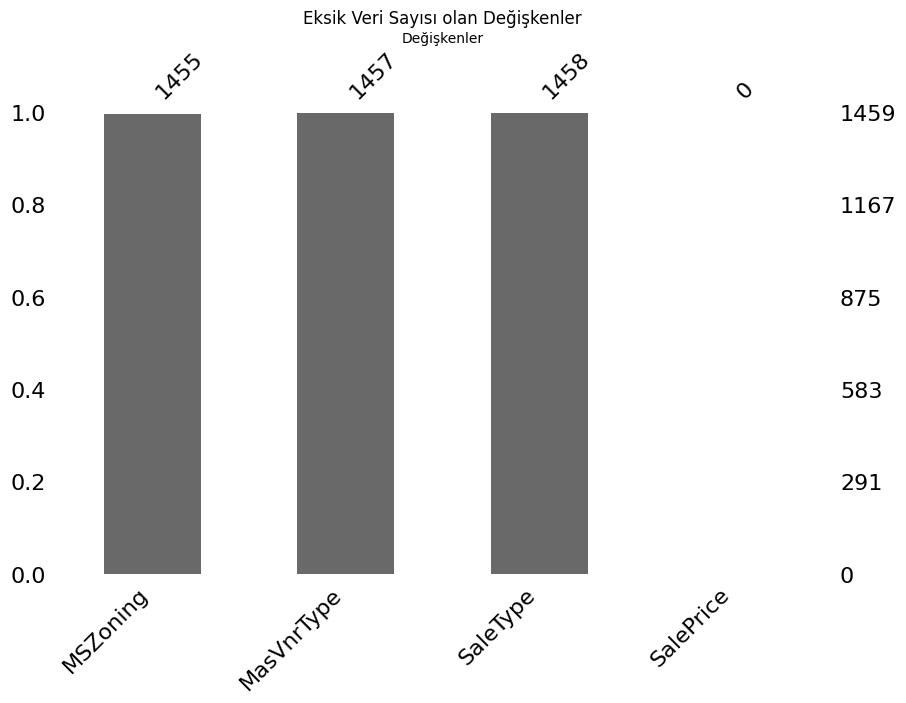

In [807]:
columns_with_missing = test_df.columns[test_df.isnull().any()]

# Sadece eksik veri içeren değişkenleri içeren alt küme oluşturuyoruz
data_missing_only = test_df[columns_with_missing]

# Missingno kütüphanesi ile eksik veri görselleştirmesi yapılıyor
msno.bar(data_missing_only, figsize=(10, 6))
plt.xlabel('Değişkenler')
plt.ylabel('Eksik Veri Sayısı')
plt.title('Eksik Veri Sayısı olan Değişkenler')
plt.show()

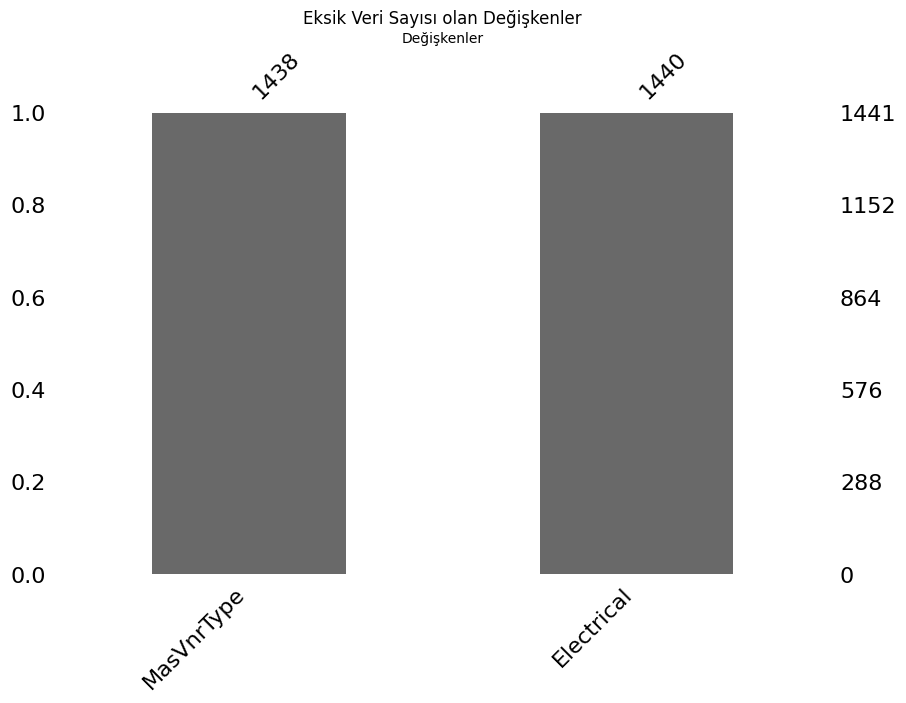

In [808]:
columns_with_missing = train_df.columns[train_df.isnull().any()]

# Sadece eksik veri içeren değişkenleri içeren alt küme oluşturuyoruz
data_missing_only = train_df[columns_with_missing]

# Missingno kütüphanesi ile eksik veri görselleştirmesi yapılıyor
msno.bar(data_missing_only, figsize=(10, 6))
plt.xlabel('Değişkenler')
plt.ylabel('Eksik Veri Sayısı')
plt.title('Eksik Veri Sayısı olan Değişkenler')
plt.show()

In [809]:
train_df.fillna(train_df.mod,inplace=True)

In [810]:
test_df.drop("SalePrice",axis=1,inplace=True)
test.fillna(train_df.mod,inplace=True)

In [811]:
test_df.fillna(train_df.mod,inplace=True)

In [812]:
train_df.isnull().sum().sum()

0

In [813]:
test_df.isnull().sum().sum()

0

# Feature transformation

In [814]:
train_df = pd.get_dummies(data=train_df,columns=train_df.select_dtypes("object").columns,dtype="int64")

In [815]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1441 entries, 0 to 1459
Columns: 214 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(13), int64(201)
memory usage: 2.4 MB


In [816]:
test_df = pd.get_dummies(data=test_df,columns=test_df.select_dtypes("object").columns,dtype="int64")

In [817]:
train_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,BsmtCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,4,3,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,4,3,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,4,3,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,3,4,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,4,3,...,0,0,0,1,0,0,0,0,1,0


In [818]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1441 entries, 0 to 1459
Columns: 214 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(13), int64(201)
memory usage: 2.4 MB


In [819]:
y = train_df.SalePrice

In [820]:
train_df.drop("SalePrice",axis=1,inplace=True)

In [821]:
y

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1441, dtype: float64

In [822]:
train_df.shape

(1441, 213)

In [823]:
213

213

# Modeling

In [824]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [825]:
x_train, x_test, y_train, y_test = train_test_split(train_df,y,test_size=0.25,random_state=42)

# RandomForestRegressor

In [826]:
rf_model = RandomForestRegressor(random_state=42)

In [827]:
rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [828]:
from sklearn.metrics import mean_squared_error
y_pred = rf_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

21966.242984296416

In [829]:
rf_params = {"max_depth":list(range(1,10)),"max_features":[3,5,10,15],"n_estimators" :[200,500,1000,2000]}

In [830]:
rf_model = RandomForestRegressor(random_state=42)

In [831]:
rf_cv_model = RandomizedSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,n_iter=50)

In [832]:
rf_cv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'max_features': [3, 5, 10, 15],
                                        'n_estimators': [200, 500, 1000, 2000]})

In [833]:
rf_cv_model.best_params_

{'n_estimators': 2000, 'max_features': 15, 'max_depth': 9}

In [834]:
rf_tuned = RandomForestRegressor(max_depth=9,max_features=15,n_estimators = 1000)

In [835]:
rf_tuned.fit(x_train,y_train)

RandomForestRegressor(max_depth=9, max_features=15, n_estimators=1000)

In [836]:
y_pred = rf_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

25006.034415964823

In [837]:
RFs_acc_train = round(rf_tuned.score(x_train, y_train)*100,2) 
RFs_acc_test = round(rf_tuned.score(x_test,y_test)*100,2)
print("Training Accuracy: % {}".format(RFs_acc_train))
print("Testing Accuracy: % {}".format(RFs_acc_test))

Training Accuracy: % 96.01
Testing Accuracy: % 87.3


# GradientBoostingRegressor

In [838]:
gb_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, max_depth=3, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state=42)
gb_model.fit(x_train, y_train)

# Calculate RMSE on training data
gb_train_pred = gb_model.predict(x_train)
gb_rmse = np.sqrt(mean_squared_error(y_train, gb_train_pred))

In [839]:
GBs_acc_train = round(gb_model.score(x_train, y_train)*100,2) 
GBs_acc_test = round(gb_model.score(x_test,y_test)*100,2)
print("Training Accuracy: % {}".format(GBs_acc_train))
print("Testing Accuracy: % {}".format(GBs_acc_test))

Training Accuracy: % 96.68
Testing Accuracy: % 92.38


In [840]:
gb_rmse

13518.574160457949

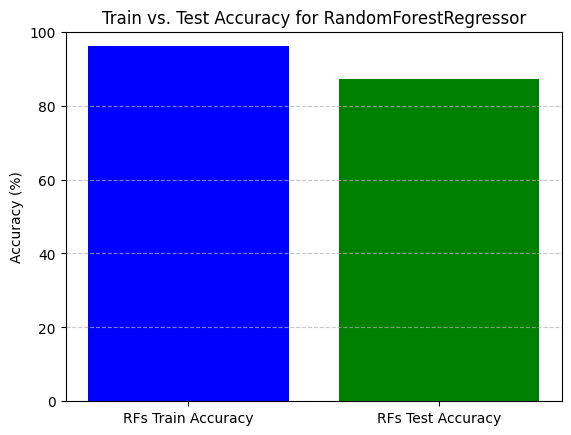

In [843]:
labels = ['RFs Train Accuracy', 'RFs Test Accuracy']
scores = [RFs_acc_train, RFs_acc_test]

# Çubuk grafik çizimi
plt.bar(labels, scores, color=['blue', 'green'])
plt.ylabel('Accuracy (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Train vs. Test Accuracy for RandomForestRegressor')
plt.ylim(0, 100)  # Y eksenini 0 ile 100 arasında sınırlıyoruz (doğruluk yüzde cinsinden olmalı)
plt.show()

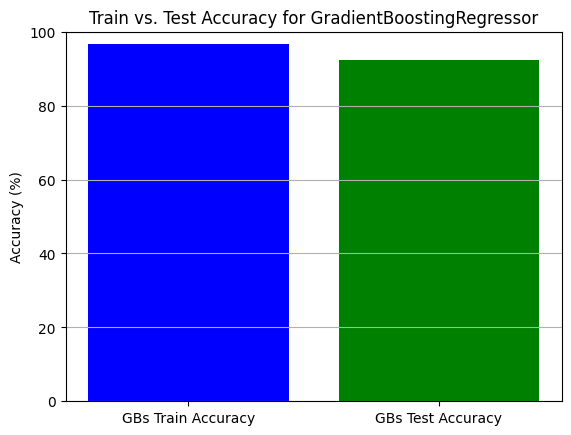

In [846]:
labels = ['GBs Train Accuracy', 'GBs Test Accuracy']
scores = [GBs_acc_train, GBs_acc_test]

# Çubuk grafik çizimi
plt.bar(labels, scores, color=['blue', 'green'])
plt.ylabel('Accuracy (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7,)
plt.title('Train vs. Test Accuracy for GradientBoostingRegressor')
plt.ylim(0, 100)  # Y eksenini 0 ile 100 arasında sınırlıyoruz (doğruluk yüzde cinsinden olmalı)
plt.show()